In [2]:
using Crystalline, MPBUtils, JLD2, LinearAlgebra, StaticArrays, SymmetryBases, PyPlot, DelimitedFiles, PrettyTables

In [3]:
cum_wyckoff_degeneracy = Dict{Tuple{Integer, Integer, String}, Vector{Vector{}}}()

Dict{Tuple{Integer, Integer, String}, Vector{Vector}}()

In [21]:
# First we show a figure showing the dielectric function for general symmetry settings:

In [19]:
loaded_eps_datav = [load("symeigs/output/sg$sg/eps1/te/sg$sg-epsid1-res64-te-input.jld2") for sg in [2, 6, 9:17...]]
isovalvv = [loaded_eps_data["isovalv"] for loaded_eps_data in loaded_eps_datav]
Rsvv = [loaded_eps_data["Rsv"] for loaded_eps_data in loaded_eps_datav]
flatvv = [loaded_eps_data["flatv"] for loaded_eps_data in loaded_eps_datav]

N = 100    
xyz = range(-.5, .5, length=100)

-0.5:0.010101010101010102:0.5

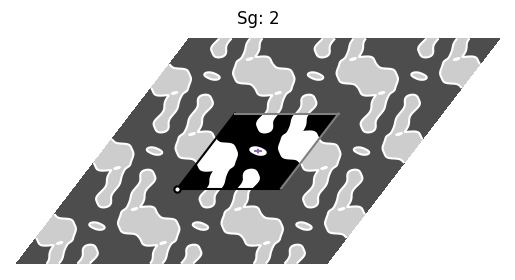

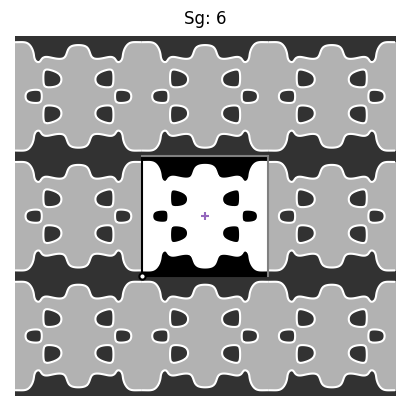

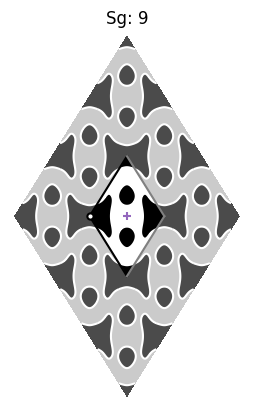

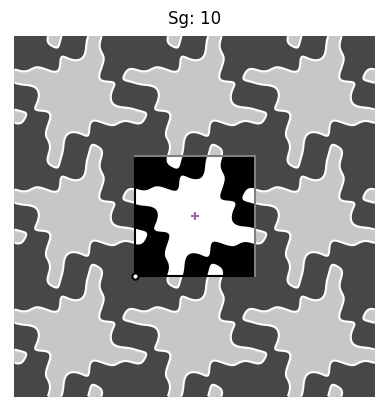

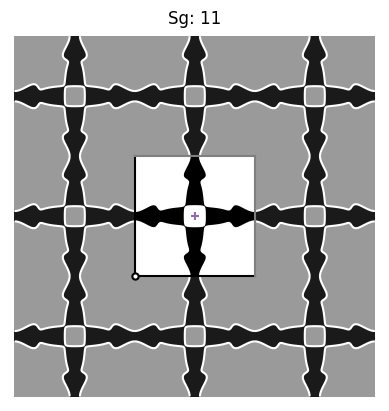

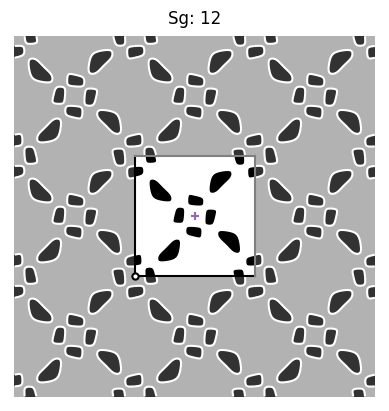

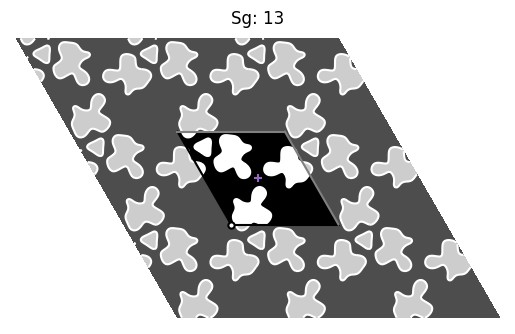

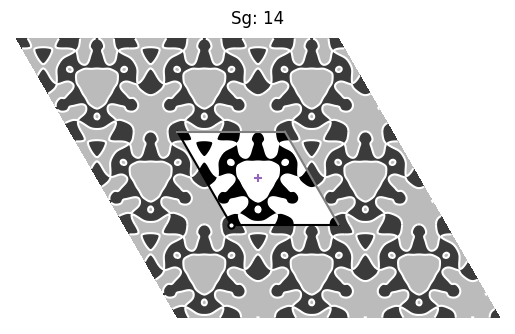

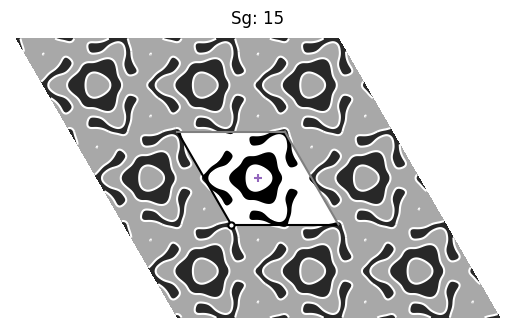

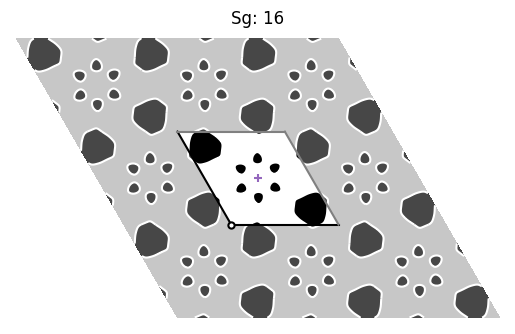

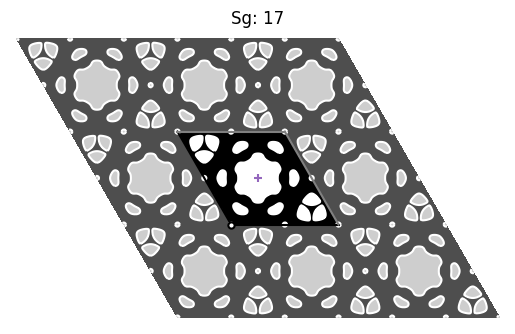

In [173]:
for sg in [2, 6, 9:17...]
plot_lattice_from_mpbparams("./symeigs/input/dim2-sg$(sg)-1-res64-tm.sh", repeat=1)
    title("Sg: $sg")
    savefig("Sg$(sg)-example.pdf")
end

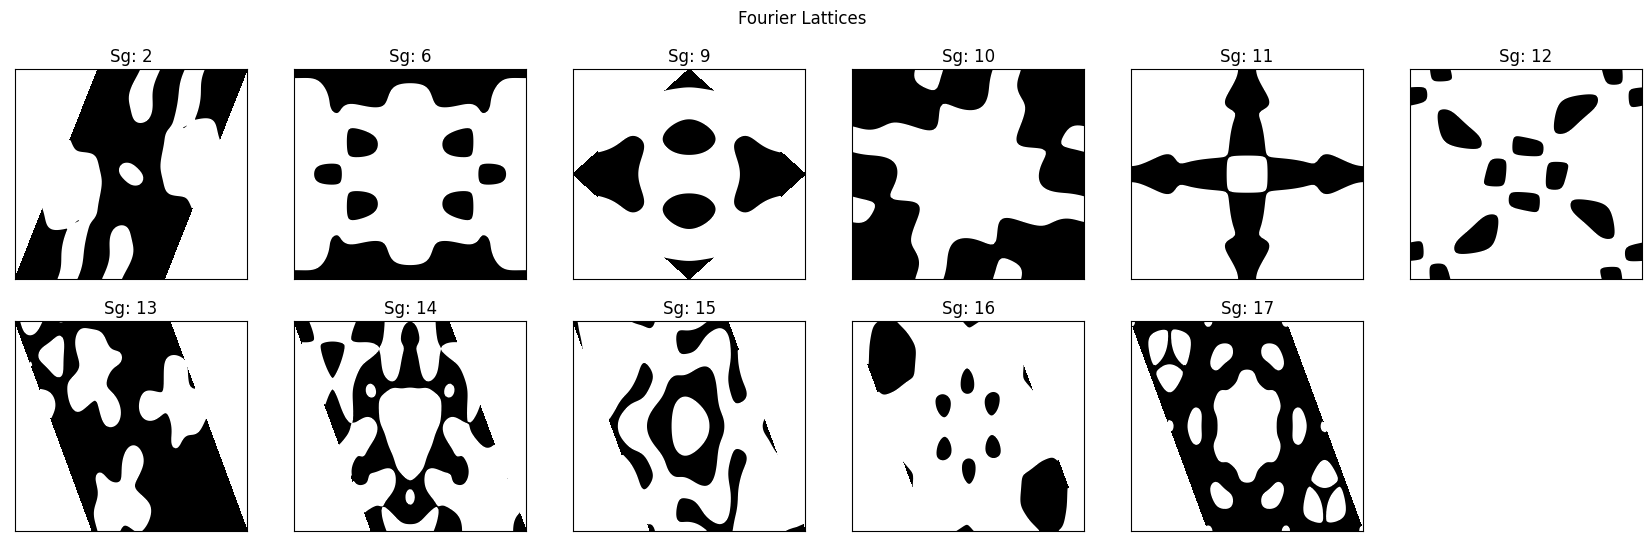

In [24]:
figure(figsize=(3*7, 3*2))
sgs = [2, 6, 9:17...]
for (i, (isovalv, Rsv, flatv)) in enumerate(zip(isovalvv, Rsvv, flatvv))
    subplot(2, 6, i)
    
    flat, Rs, isoval = [first(flatv), first(Rsv), first(isovalv)]
    
    X = broadcast((x,y) -> x*Rs[1][1] + y*Rs[2][1], reshape(xyz,(1,N)), reshape(xyz, (N,1)))
    Y = broadcast((x,y) -> x*Rs[1][2] + y*Rs[2][2], reshape(xyz,(1,N)), reshape(xyz, (N,1)))

    vals = Crystalline.calcfouriergridded(xyz, flat, 100)

    contourf(X,Y,vals; levels=(-1e12, isoval, 1e12), cmap=plt.get_cmap("gray",2))
    contour(X,Y,vals,levels=(isoval,), colors="w", linestyles="solid")
    xticks([])
    yticks([])
    title("Sg: $(sgs[i])")
end
suptitle("Fourier Lattices")
savefig("Lattice_Examples.pdf")
#savefig("CummulativelyFragile.pdf")

In [40]:
eps4_loaded_data = load("./symeigs/output/sg17/eps4/te/sg17-epsid4-res64-te.jld2")
eps1_loaded_data = load("./symeigs/output/sg17/eps1/te/sg17-epsid1-res64-te.jld2")
eps3_loaded_data = load("./symeigs/output/sg17/eps3/te/sg17-epsid3-res64-te.jld2")

Dict{String, Any} with 5 entries:
  "symeigsdv"     => Dict{String, Vector{Vector{ComplexF64}}}[Dict("M"=>[[1.0+0…
  "summariesv"    => Vector{BandSummary}[[1-band (trivial): [M₂, Γ₂, K₂], 2-ban…
  "brs"           => BandRep[[1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 3], [0, 1,…
  "cumsummariesv" => Vector{BandSummary}[[1-band (trivial): [M₂, Γ₂, K₂], 3-ban…
  "lgirsd"        => Dict{String, Vector{LGIrrep{2}}}("M"=>[LGIrrep{2}("M₁", [1…

In [52]:
eps4_loaded_data["cumsummariesv"][10][1].topology == TRIVIAL


true

In [53]:
eps1_loaded_data["summariesv"][10][1]

4-band BandSummary:
 bands:      1:4
 n:          2M₂+M₃+M₄, 2Γ₂+Γ₅, 2K₂+K₃
 topology:   trivial

In [41]:
eps3_loaded_data["summariesv"][301]

8-element Vector{BandSummary}:
 6-band (trivial): [2M₂+2M₃+2M₄, 2Γ₂+Γ₅+Γ₆, 2K₂+2K₃]
 2-band (trivial): [M₁+M₂, Γ₅, K₃]
 1-band (trivial): [M₂, Γ₂, K₂]
 4-band (trivial): [M₁+M₂+M₃+M₄, Γ₃+Γ₄+Γ₆, K₁+K₂+K₃]
 13-band (trivial): [2M₁+4M₂+4M₃+3M₄, 2Γ₂+2Γ₃+Γ₄+2Γ₅+2Γ₆, K₁+2K₂+5K₃]
 5-band (trivial): [M₁+2M₂+M₃+M₄, Γ₂+Γ₅+Γ₆, K₁+2K₂+K₃]
 3-band (trivial): [M₁+M₃+M₄, Γ₁+Γ₅, K₁+K₃]
 3-band (trivial): [M₁+M₂+M₄, Γ₄+Γ₆, K₂+K₃]

In [23]:
stable_c2 = merge([load("./symeigs/sg$sg-data.jld2")["cum_stable_count"] for sg in (2, 6, 9)]...)
stable_c2 = sort(collect(stable_c2), by = x -> x[1] );

row_names_c2 = [x[1] for x in stable_c2]
header_c2 = ["1", "2", "3", "4", "5"]

stable_c2 = transpose(hcat([x[2] for x in stable_c2]...))

stable_c4 = merge([load("./symeigs/sg$sg-data.jld2")["cum_stable_count"] for sg in (10, 11, 12)]...)
stable_c4 = sort(collect(stable_c4), by = x -> x[1] );

row_names_c4 = [x[1] for x in stable_c4]
header_c4 = ["1", "2", "3", "4", "5"]

stable_c4 = transpose(hcat([x[2] for x in stable_c4]...));

stable_c6 = merge([load("./symeigs/sg$sg-data.jld2")["cum_stable_count"] for sg in (16, 17)]...)
stable_c6 = sort(collect(stable_c6), by = x -> x[1] );

row_names_c6 = [x[1] for x in stable_c6]
header_c6 = ["1", "2", "3", "4", "5"]

stable_c6 = transpose(hcat([x[2] for x in stable_c6]...));



In [24]:
stable_c2

30×5 transpose(::Matrix{Int64}) with eltype Int64:
 3717  6233  4274  5692  4855
 2966  3016  4179  3494  4025
 3830  6359  4320  5741  4814
 2891  2901  4023  3328  3825
 4081  6447  4486  5819  4885
 2846  2836  3918  3247  3693
 4441  6519  4756  6065  4924
 2802  2781  3848  3118  3600
 4574  6510  4920  6176  4951
 2793  2748  3796  3076  3539
    0     0     0     0     0
    0     0     0     0     0
    0     0     0     0     0
    ⋮                    
    0     0     0     0     0
    0     0     0     0     0
    0     0     0     0     0
    0     0     0     0     0
    0     0     0     0     0
    0     0     0     0     0
    0     0     0     0     0
    0     0     0     0     0
    0     0     0     0     0
    0     0     0     0     0
    0     0     0     0     0
    0     0     0     0     0

In [6]:
pretty_table(stable_c2, header=header_c2, row_names = row_names_c2, title="Stable Topolgy C2")
pretty_table(stable_c4, header=header_c4, row_names = row_names_c4, title="Stable Topolgy C4")
pretty_table(stable_c6, header=header_c6, row_names = row_names_c6, title="Stable Topolgy C6")

Stable Topolgy C2
┌──────────────┬──────┬──────┬──────┬──────┬──────┐
│              │    1 │    2 │    3 │    4 │    5 │
├──────────────┼──────┼──────┼──────┼──────┼──────┤
│ (2, 1, "te") │ 3717 │ 6233 │ 4274 │ 5692 │ 4855 │
│ (2, 1, "tm") │ 2966 │ 3016 │ 4179 │ 3494 │ 4025 │
│ (2, 2, "te") │ 3830 │ 6359 │ 4320 │ 5741 │ 4814 │
│ (2, 2, "tm") │ 2891 │ 2901 │ 4023 │ 3328 │ 3825 │
│ (2, 3, "te") │ 4081 │ 6447 │ 4486 │ 5819 │ 4885 │
│ (2, 3, "tm") │ 2846 │ 2836 │ 3918 │ 3247 │ 3693 │
│ (2, 4, "te") │ 4441 │ 6519 │ 4756 │ 6065 │ 4924 │
│ (2, 4, "tm") │ 2802 │ 2781 │ 3848 │ 3118 │ 3600 │
│ (2, 5, "te") │ 4574 │ 6510 │ 4920 │ 6176 │ 4951 │
│ (2, 5, "tm") │ 2793 │ 2748 │ 3796 │ 3076 │ 3539 │
│ (6, 1, "te") │    0 │    0 │    0 │    0 │    0 │
│ (6, 1, "tm") │    0 │    0 │    0 │    0 │    0 │
│ (6, 2, "te") │    0 │    0 │    0 │    0 │    0 │
│ (6, 2, "tm") │    0 │    0 │    0 │    0 │    0 │
│ (6, 3, "te") │    0 │    0 │    0 │    0 │    0 │
│ (6, 3, "tm") │    0 │    0 │    0 │    0 │  

In [12]:
fragile_c2 = merge([load("./symeigs/sg$sg-data.jld2")["cum_fragile_count"] for sg in (2, 6, 9)]...)
fragile_c2 = sort(collect(fragile_c2), by = x -> x[1] );

row_names_c2 = [x[1] for x in fragile_c2]
header_c2 = ["1", "2", "3", "4", "5"]
fragile_c2 = transpose(hcat([x[2] for x in fragile_c2]...))


fragile_c6 = merge([load("./symeigs/sg$sg-data.jld2")["cum_fragile_count"] for sg in (16, 17)]...)
fragile_c6 = sort(collect(fragile_c6), by = x -> x[1] );

row_names_c6 = [x[1] for x in fragile_c6]
header_c6 = ["1", "2", "3", "4", "5"]

fragile_c6 = transpose(hcat([x[2] for x in fragile_c6]...))

fragile_c4 = merge([load("./symeigs/sg$sg-data.jld2")["cum_fragile_count"] for sg in (10, 11, 12)]...)
fragile_c4 = sort(collect(fragile_c4), by = x -> x[1] );

row_names_c4 = [x[1] for x in fragile_c4]
header_c4 = ["1", "2", "3", "4", "5"]

fragile_c4 = transpose(hcat([x[2] for x in fragile_c4]...));

fragile_c3 = merge([load("./symeigs/sg$sg-data.jld2")["cum_fragile_count"] for sg in (13, 14, 15)]...)
fragile_c3 = sort(collect(fragile_c3), by = x -> x[1] );

row_names_c3 = [x[1] for x in fragile_c3]
header_c3 = ["1", "2", "3", "4", "5"]

fragile_c3 = transpose(hcat([x[2] for x in fragile_c3]...));


In [13]:
pretty_table(fragile_c2, header=header_c2, row_names = row_names_c2, title="Fragile Topolgy C2")
pretty_table(fragile_c4, header=header_c4, row_names = row_names_c4, title="Fragile Topolgy C4")
pretty_table(fragile_c6, header=header_c6, row_names = row_names_c6, title="Fragile Topolgy C6")
pretty_table(fragile_c3, header=header_c3, row_names = row_names_c3, title="Fragile Topolgy C3")

Fragile Topolgy C2
┌──────────────┬───┬───┬───┬───┬───┐
│              │ 1 │ 2 │ 3 │ 4 │ 5 │
├──────────────┼───┼───┼───┼───┼───┤
│ (2, 1, "te") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (2, 1, "tm") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (2, 2, "te") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (2, 2, "tm") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (2, 3, "te") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (2, 3, "tm") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (2, 4, "te") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (2, 4, "tm") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (2, 5, "te") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (2, 5, "tm") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (6, 1, "te") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (6, 1, "tm") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (6, 2, "te") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (6, 2, "tm") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (6, 3, "te") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (6, 3, "tm") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (6, 4, "te") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (6, 4, "tm") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (6, 5, "te") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (6, 5, "tm") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (9, 1, "te") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (9, 1, "tm") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (9, 2, "te") │ 0 │ 0 │ 0 │ 0 │ 0 │
│ (9, 2, "tm") │ 0 

In [13]:
load("symeigs/sg10-corner-data.jld2")["cum_wyckoff_degeneracy"]

Dict{Tuple{Integer, Integer, String}, Vector{Vector{Integer}}} with 10 entries:
  (10, 4, "tm") => [[0, 0, 0, 0, 0, 0], [1048, 0, 0, 0, 0, 0], [108, 67, 0, 0, …
  (10, 4, "te") => [[1, 0, 0, 0, 0, 0], [1743, 1, 0, 0, 0, 0], [802, 793, 0, 0,…
  (10, 5, "tm") => [[0, 0, 0, 0, 0, 0], [1051, 0, 0, 0, 0, 0], [114, 68, 0, 0, …
  (10, 5, "te") => [[0, 0, 0, 0, 0, 0], [1822, 1, 0, 0, 0, 0], [1028, 998, 0, 0…
  (10, 2, "tm") => [[0, 0, 0, 0, 0, 0], [1055, 0, 0, 0, 0, 0], [74, 63, 0, 0, 0…
  (10, 1, "tm") => [[0, 0, 0, 0, 0, 0], [1052, 0, 0, 0, 0, 0], [52, 52, 0, 0, 0…
  (10, 2, "te") => [[0, 0, 0, 0, 0, 0], [1747, 0, 0, 0, 0, 0], [276, 274, 0, 0,…
  (10, 1, "te") => [[1, 0, 0, 0, 0, 0], [1905, 0, 0, 0, 0, 0], [60, 58, 0, 0, 0…
  (10, 3, "tm") => [[0, 0, 0, 0, 0, 0], [1046, 0, 0, 0, 0, 0], [88, 64, 0, 0, 0…
  (10, 3, "te") => [[2, 0, 0, 0, 0, 0], [1690, 1, 0, 0, 0, 0], [496, 491, 0, 0,…

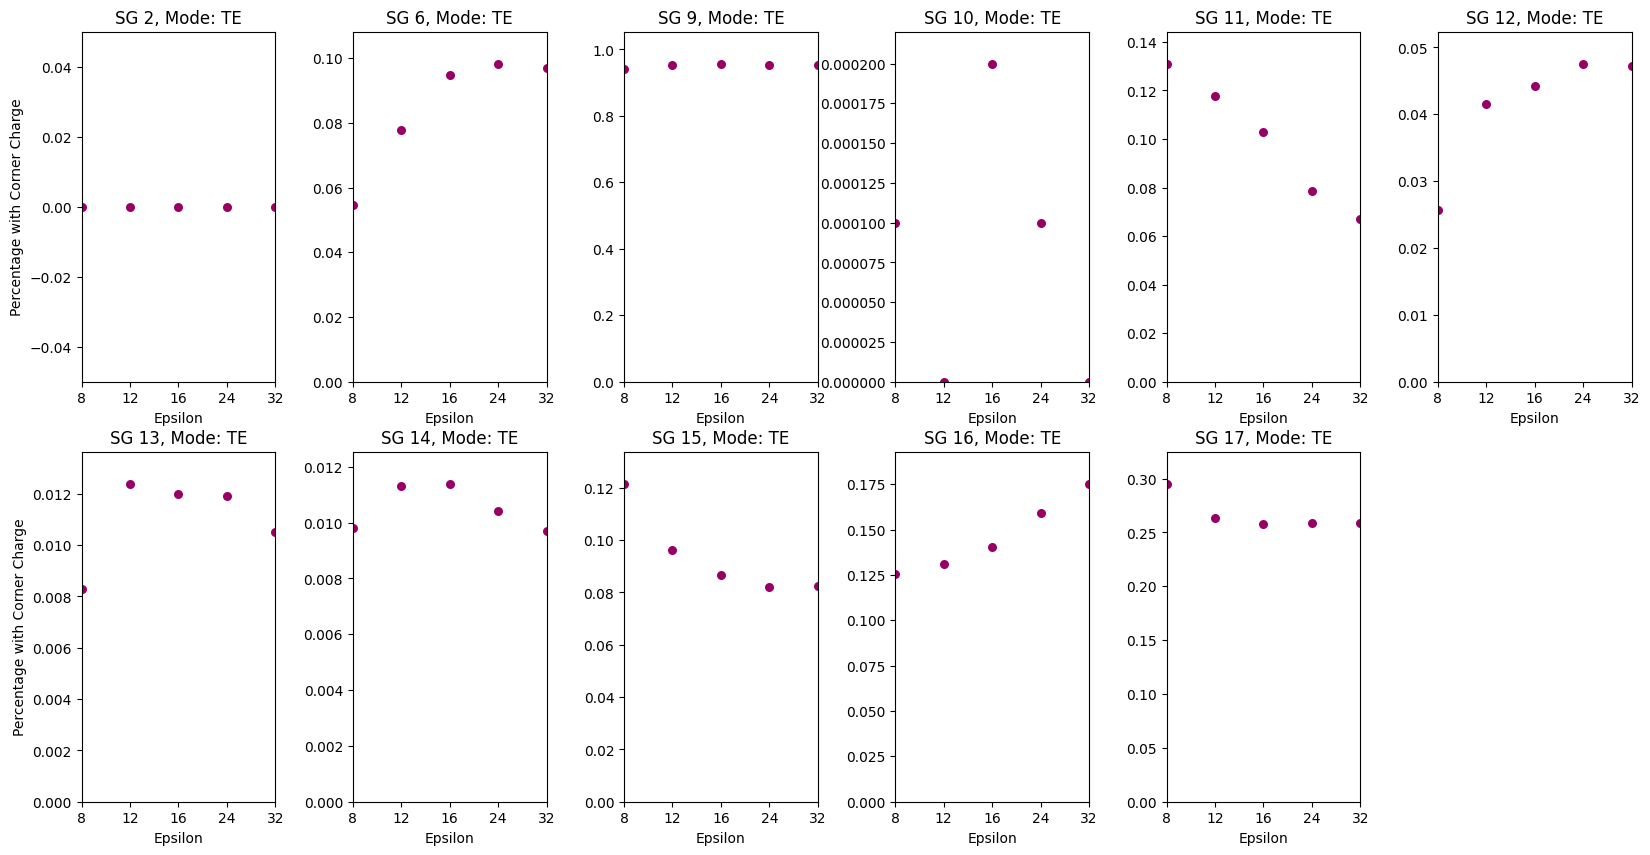

In [42]:
figure(figsize=(20, 10))
tight_layout()
subplots_adjust(wspace=0.4)
for (idx, sg) in enumerate([2, 6, 9:17...])
    corner_data = load("symeigs/sg$sg-corner-data.jld2") 
    first_band_data = [x[1][1] ./ 1e4 for x in [corner_data["cum_wyckoff_degeneracy"][(sg, i, "te")] for i in 1:5]]
    subplot(2, 6, idx)
    scatter(1:5, first_band_data, color=[0.6, 0, 0.4], s=30)
    title("SG $sg, Mode: TE")
    ylim(0, maximum(first_band_data)*1.1)
    xticks([1, 2, 3, 4, 5], ["8", "12", "16", "24", "32"])
    xlim(1, 5)
    xlabel("Epsilon")
    if idx == 1 || idx == 7 
        ylabel("Percentage with Corner Charge")
    end
end

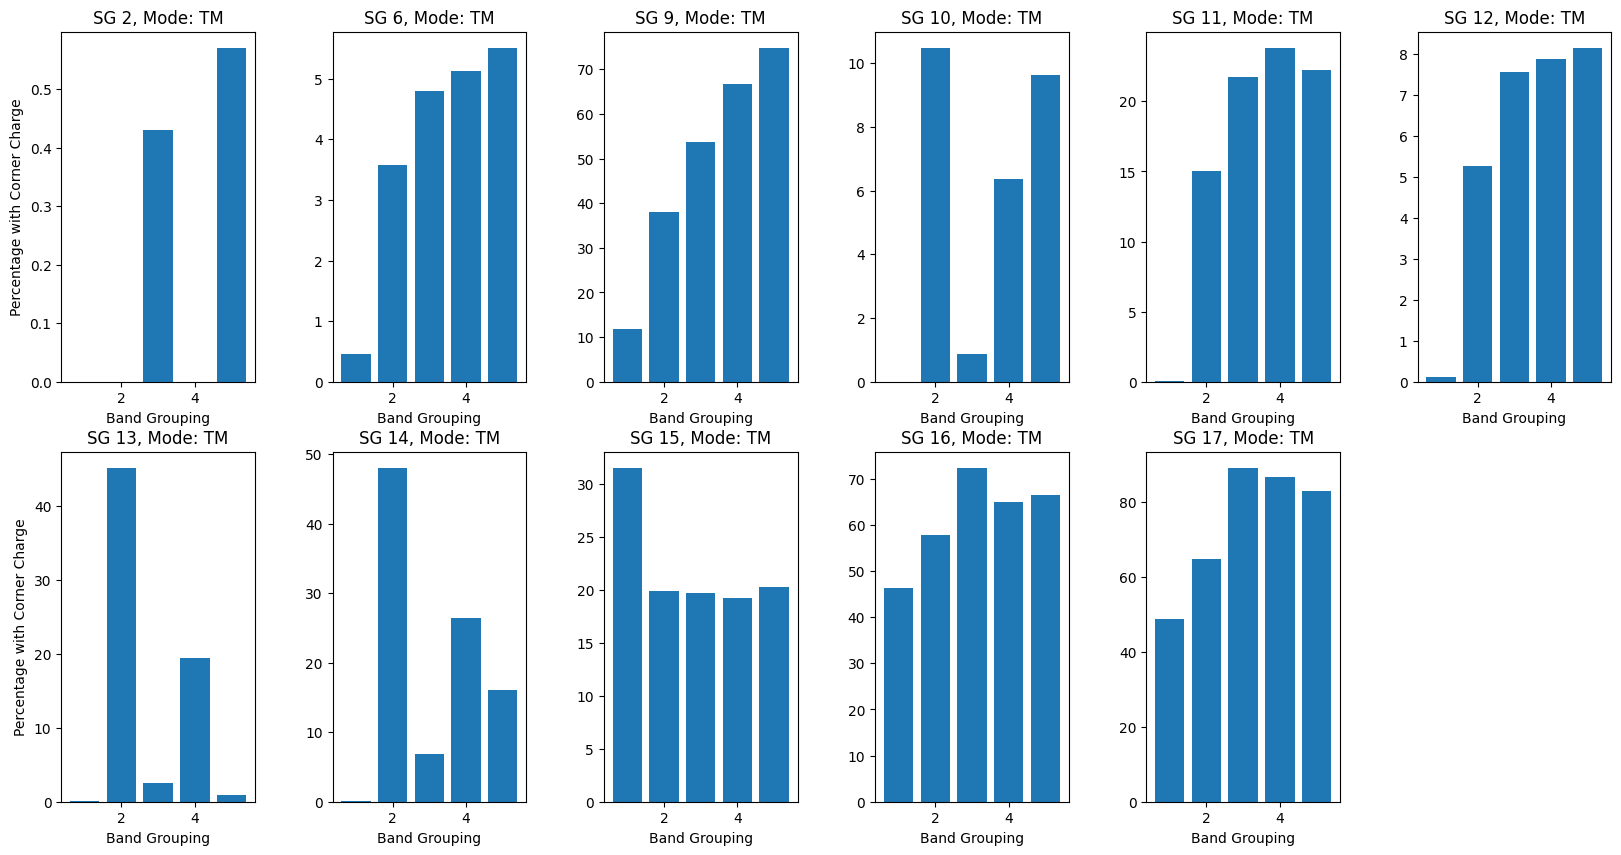

In [61]:
figure(figsize=(20, 10))
tight_layout()
subplots_adjust(wspace=0.4)

for (idx, sg) in enumerate([2, 6, 9:17...])
    subplot(2, 6, idx)

    corner_data = load("symeigs/sg$sg-corner-data.jld2") 
    band_data = [x[1] for x in corner_data["cum_wyckoff_degeneracy"][(sg, 3, "tm")][1:5] ./ 1e4 * 100]
    bar(1:5, band_data, color=[0.6, 0, 0.4])
    if idx == 1 || idx == 7 
        ylabel("Percentage with Corner Charge")
    end
    title("SG $sg, Mode: TM")
    xlabel("Band Grouping")
end

In [29]:
data_c2 = merge([load("./symeigs/sg$sg-corner-data.jld2")["cum_wyckoff_degeneracy"] for sg in (2, 6, 9)]...)

data_c2 = sort(collect(data_c2), by = x -> x[1] );

row_names_c2 = [x[1] for x in data_c2]
header_c2 = ["1", "2", "3", "4"]

data_c2 = transpose(hcat([x[2][1][1:4] for x in data_c2]...))

data_c3 = merge([load("./symeigs/sg$sg-corner-data.jld2")["cum_wyckoff_degeneracy"] for sg in (13, 14, 15)]...)

data_c3 = sort(collect(data_c3), by = x -> x[1] );

row_names_c3 = [x[1] for x in data_c3]
header_c3 = ["1", "2", "3", "4"]

data_c3 = transpose(hcat([x[2][1][1:4] for x in data_c3]...))

data_c4 = merge([load("./symeigs/sg$sg-corner-data.jld2")["cum_wyckoff_degeneracy"] for sg in (10, 11, 12)]...)

data_c4 = sort(collect(data_c4), by = x -> x[1] );

row_names_c4 = [x[1] for x in data_c4]
header_c4 = ["1", "2", "3", "4"]

data_c4 = transpose(hcat([x[2][1][1:4] for x in data_c4]...));

data_c6 = merge([load("./symeigs/sg$sg-corner-data.jld2")["cum_wyckoff_degeneracy"] for sg in (16, 17)]...)

data_c6 = sort(collect(data_c6), by = x -> x[1] );

row_names_c6 = [x[1] for x in data_c6]
header_c6 = ["1", "2", "3", "4"]

data_c6 = transpose(hcat([x[2][1][1:4] for x in data_c6]...));

In [30]:
pretty_table(data_c2, header=header_c2, row_names = row_names_c2, title="C2")
pretty_table(data_c3, header=header_c3, row_names = row_names_c3, title="C3")
pretty_table(data_c4, header=header_c4, row_names = row_names_c4, title="C4")
pretty_table(data_c6, header=header_c6, row_names = row_names_c6, title="C6")

C2
┌──────────────┬──────┬──────┬────┬────┐
│              │    1 │    2 │  3 │  4 │
├──────────────┼──────┼──────┼────┼────┤
│ (2, 1, "te") │    0 │    0 │  0 │  0 │
│ (2, 1, "tm") │    0 │    0 │  0 │  0 │
│ (2, 2, "te") │    0 │    0 │  0 │  0 │
│ (2, 2, "tm") │    0 │    0 │  0 │  0 │
│ (2, 3, "te") │    0 │    0 │  0 │  0 │
│ (2, 3, "tm") │    0 │    0 │  0 │  0 │
│ (2, 4, "te") │    0 │    0 │  0 │  0 │
│ (2, 4, "tm") │    0 │    0 │  0 │  0 │
│ (2, 5, "te") │    0 │    0 │  0 │  0 │
│ (2, 5, "tm") │    0 │    0 │  0 │  0 │
│ (6, 1, "te") │  548 │   13 │ 13 │ 13 │
│ (6, 1, "tm") │   46 │    3 │  3 │  3 │
│ (6, 2, "te") │  780 │   18 │ 18 │ 18 │
│ (6, 2, "tm") │   50 │    4 │  4 │  4 │
│ (6, 3, "te") │  949 │   36 │ 36 │ 36 │
│ (6, 3, "tm") │   45 │    3 │  3 │  3 │
│ (6, 4, "te") │  984 │   35 │ 35 │ 35 │
│ (6, 4, "tm") │   46 │    4 │  4 │  4 │
│ (6, 5, "te") │  971 │   45 │ 45 │ 45 │
│ (6, 5, "tm") │   44 │    4 │  4 │  4 │
│ (9, 1, "te") │ 9410 │ 1571 │  0 │  0 │
│ (9, 1, "tm"

In [4]:
rgb(x, y, z) = [x/255, y/255, z/255]

rgb (generic function with 1 method)

In [146]:
sg2_tm_corners = filter(x -> x[1][3] == "tm" && x[1][2] ==3, load("./symeigs/sg2-corner-data.jld2")["cum_corner_charges"]); 
sg2_te_corners = filter(x -> x[1][3] == "te" && x[1][2] ==3, load("./symeigs/sg2-corner-data.jld2")["cum_corner_charges"]);
sg6_tm_corners = filter(x -> x[1][3] == "tm" && x[1][2] ==3, load("./symeigs/sg6-corner-data.jld2")["cum_corner_charges"]); 
sg6_te_corners = filter(x -> x[1][3] == "te" && x[1][2] ==3, load("./symeigs/sg6-corner-data.jld2")["cum_corner_charges"]);
sg9_tm_corners = filter(x -> x[1][3] == "tm" && x[1][2] ==3, load("./symeigs/sg9-corner-data.jld2")["cum_corner_charges"]); 
sg9_te_corners = filter(x -> x[1][3] == "te" && x[1][2] ==3, load("./symeigs/sg9-corner-data.jld2")["cum_corner_charges"]);

In [12]:
sg16_tm_corners = filter(x -> x[1][3] == "tm" && x[1][2] ==3, load("./symeigs/sg16-corner-data.jld2")["cum_corner_charges"]); 
sg16_te_corners = filter(x -> x[1][3] == "te" && x[1][2] ==3, load("./symeigs/sg16-corner-data.jld2")["cum_corner_charges"]);

sg17_tm_corners = filter(x -> x[1][3] == "tm" && x[1][2] ==3, load("./symeigs/sg17-corner-data.jld2")["cum_corner_charges"]); 
sg17_te_corners = filter(x -> x[1][3] == "te" && x[1][2] ==3, load("./symeigs/sg17-corner-data.jld2")["cum_corner_charges"]);

In [15]:
sg13_tm_corners = filter(x -> x[1][3] == "tm" && x[1][2] ==3, load("./symeigs/sg13-corner-data.jld2")["cum_corner_charges"]); 
sg13_te_corners = filter(x -> x[1][3] == "te" && x[1][2] ==3, load("./symeigs/sg13-corner-data.jld2")["cum_corner_charges"]);

sg14_tm_corners = filter(x -> x[1][3] == "tm" && x[1][2] ==3, load("./symeigs/sg14-corner-data.jld2")["cum_corner_charges"]); 
sg14_te_corners = filter(x -> x[1][3] == "te" && x[1][2] ==3, load("./symeigs/sg14-corner-data.jld2")["cum_corner_charges"]);

sg15_tm_corners = filter(x -> x[1][3] == "tm" && x[1][2] ==3, load("./symeigs/sg15-corner-data.jld2")["cum_corner_charges"]); 
sg15_te_corners = filter(x -> x[1][3] == "te" && x[1][2] ==3, load("./symeigs/sg15-corner-data.jld2")["cum_corner_charges"]);

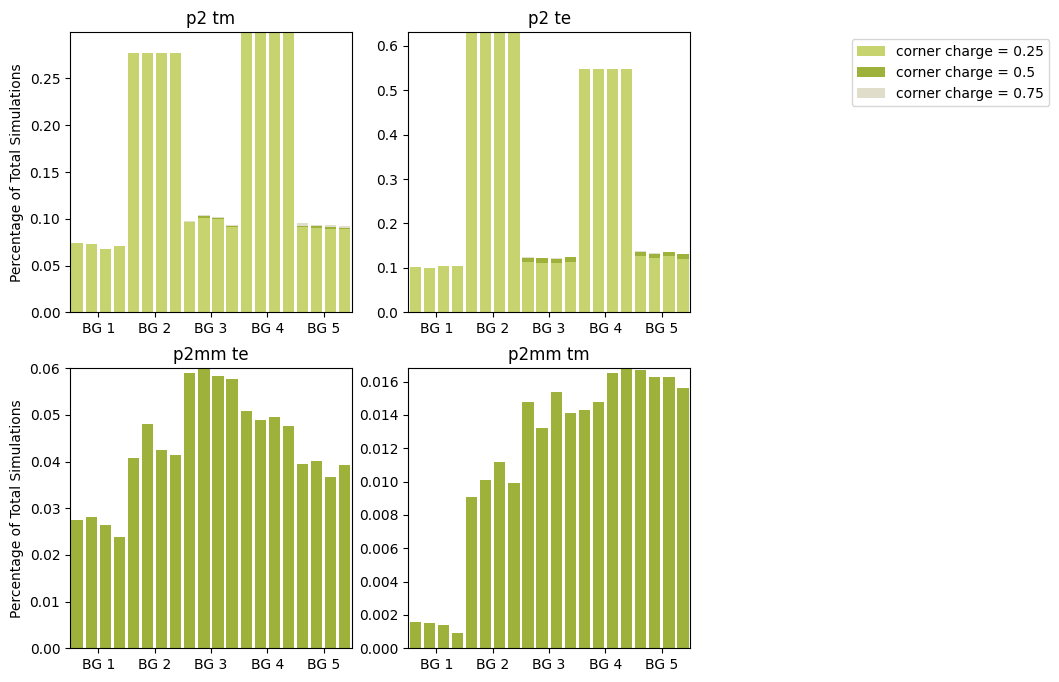

(PyCall.PyObject[PyObject <matplotlib.axis.XTick object at 0x7f6c6abe1760>, PyObject <matplotlib.axis.XTick object at 0x7f6c6abe1730>, PyObject <matplotlib.axis.XTick object at 0x7f6c6abdd2b0>, PyObject <matplotlib.axis.XTick object at 0x7f6c6ab3dcd0>, PyObject <matplotlib.axis.XTick object at 0x7f6c6aaca220>], PyCall.PyObject[PyObject Text(2.5, 0, 'BG 1'), PyObject Text(6.5, 0, 'BG 2'), PyObject Text(10.5, 0, 'BG 3'), PyObject Text(14.5, 0, 'BG 4'), PyObject Text(18.5, 0, 'BG 5')])

In [14]:
colors = [[199, 211, 111] ./ 255, [158, 178, 59] ./ 255, [224, 222, 202] ./ 255]
N = 1e4

figure(figsize=(8, 8))
subplot(2, 2, 1)

ylabel("Percentage of Total Simulations")
for (i, (key, val)) in enumerate(sg2_tm_corners)
    for band_num in 1:5
        band = val[band_num] / N
        for (k, j) in enumerate(3:3:11)
            bar(i + (band_num - 1)*4, band[j], bottom = sum(band[1:j-1]), color = colors[k])
        end
    end
end
xticks([2.5:4:18.5...], ["BG 1", "BG 2", "BG 3", "BG 4", "BG 5"])
title("p2 tm")
xlim(0.5,20.5)

subplot(2, 2, 2)
for (i, (key, val)) in enumerate(sg2_te_corners)
    for band_num in 1:5
        band = val[band_num] / N
        for (k, j) in enumerate(3:3:11)
            if band_num == 1 && i == 1
            bar(i + (band_num - 1)*4, band[j], bottom = sum(band[1:j-1]), color = colors[k], label="corner charge = $(j/12)")
            else               
            bar(i + (band_num - 1)*4, band[j], bottom = sum(band[1:j-1]), color = colors[k])
            end
        end
    end
end
title("p2 te")
xlim(0.5,20.5)

xticks([2.5:4:18.5...], ["BG 1", "BG 2", "BG 3", "BG 4", "BG 5"])

bb = legend().get_bbox_to_anchor().inverse_transformed(gca().transAxes)

xOffset = 1.3
bb.x0 += xOffset
bb.x1 += xOffset
gca().legend().set_bbox_to_anchor(bb, transform = gca().transAxes)

subplot(2, 2, 3)
for (i, (key, val)) in enumerate(sg6_te_corners)
    for band_num in 1:5
        band = val[band_num] / N
        for (k, j) in enumerate(3:3:11)
            bar(i + (band_num - 1)*4, band[j], bottom = sum(band[1:j-1]), color = colors[k])
        end
    end
end
title("p2mm te")
xlim(0.5,20.5)

xticks([2.5:4:18.5...], ["BG 1", "BG 2", "BG 3", "BG 4", "BG 5"])

ylabel("Percentage of Total Simulations")

subplot(2, 2, 4)
for (i, (key, val)) in enumerate(sg6_tm_corners)
    for band_num in 1:5
        band = val[band_num] / N
        for (k, j) in enumerate(3:3:11)
            bar(i + (band_num - 1)*4, band[j], bottom = sum(band[1:j-1]), color = colors[k])
        end
    end
end
title("p2mm tm")
xlim(0.5,20.5)

xticks([2.5:4:18.5...], ["BG 1", "BG 2", "BG 3", "BG 4", "BG 5"])



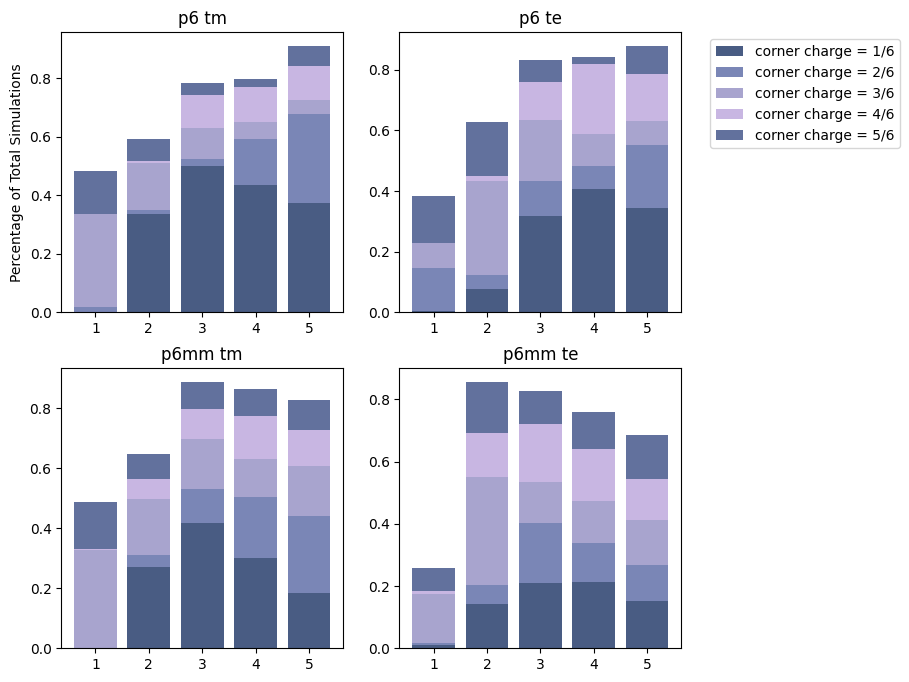

PyObject Text(0.5, 1.0, 'p6mm te')

In [141]:
figure(figsize=(8, 8))
subplot(2, 2, 1)

colors = [rgb(73, 92, 131), rgb(122, 134, 182), rgb(168, 164, 206), rgb(200, 182, 226)]
push!(colors, 1/2*(colors[1]+colors[2]))
push!(colors, 1/2*(colors[3]+colors[4]))

ylabel("Percentage of Total Simulations")
for (i, (key, val)) in enumerate(sg16_tm_corners)
    for band_num in 1:5
        band = val[band_num] / N
        for (k, j) in enumerate(2:2:11)
            bar(i + (band_num - 1), band[j], bottom = sum(band[1:j-1]), color = colors[k])
        end
    end
end
#xticks([2.5:4:18.5...], ["BG 1", "BG 2", "BG 3", "BG 4", "BG 5"])
title("p6 tm")
#xlim(0.5,20.5)

subplot(2, 2, 2)
for (i, (key, val)) in enumerate(sg16_te_corners)
    for band_num in 1:5
        band = val[band_num] / N
        for (k, j) in enumerate(2:2:11)
            if band_num == 1 && i == 1
            bar(i + (band_num - 1), band[j], bottom = sum(band[1:j-1]), color = colors[k], label="corner charge = $(round(Int,j*6/12))/6")
            else               
            bar(i + (band_num - 1), band[j], bottom = sum(band[1:j-1]), color = colors[k])
            end
        end
    end
end
title("p6 te")

#xticks([2.5:4:18.5...], ["BG 1", "BG 2", "BG 3", "BG 4", "BG 5"])

bb = legend().get_bbox_to_anchor().inverse_transformed(gca().transAxes)

xOffset = 0.8
bb.x0 += xOffset
bb.x1 += xOffset
gca().legend().set_bbox_to_anchor(bb, transform = gca().transAxes)

subplot(2, 2, 3)
for (i, (key, val)) in enumerate(sg17_tm_corners)
    for band_num in 1:5
        band = val[band_num] / N
        for (k, j) in enumerate(2:2:11)
            if band_num == 1 && i == 1
            bar(i + (band_num - 1), band[j], bottom = sum(band[1:j-1]), color = colors[k], label="corner charge = $(round(Int,j*6/12))/6")
            else               
            bar(i + (band_num - 1), band[j], bottom = sum(band[1:j-1]), color = colors[k])
            end
        end
    end
end
title("p6mm tm")


subplot(2, 2, 4)
for (i, (key, val)) in enumerate(sg17_te_corners)
    for band_num in 1:5
        band = val[band_num] / N
        for (k, j) in enumerate(2:2:11)
            if band_num == 1 && i == 1
            bar(i + (band_num - 1), band[j], bottom = sum(band[1:j-1]), color = colors[k], label="corner charge = $(round(Int,j*6/12))/6")
            else               
            bar(i + (band_num - 1), band[j], bottom = sum(band[1:j-1]), color = colors[k])
            end
        end
    end
end
title("p6mm te")



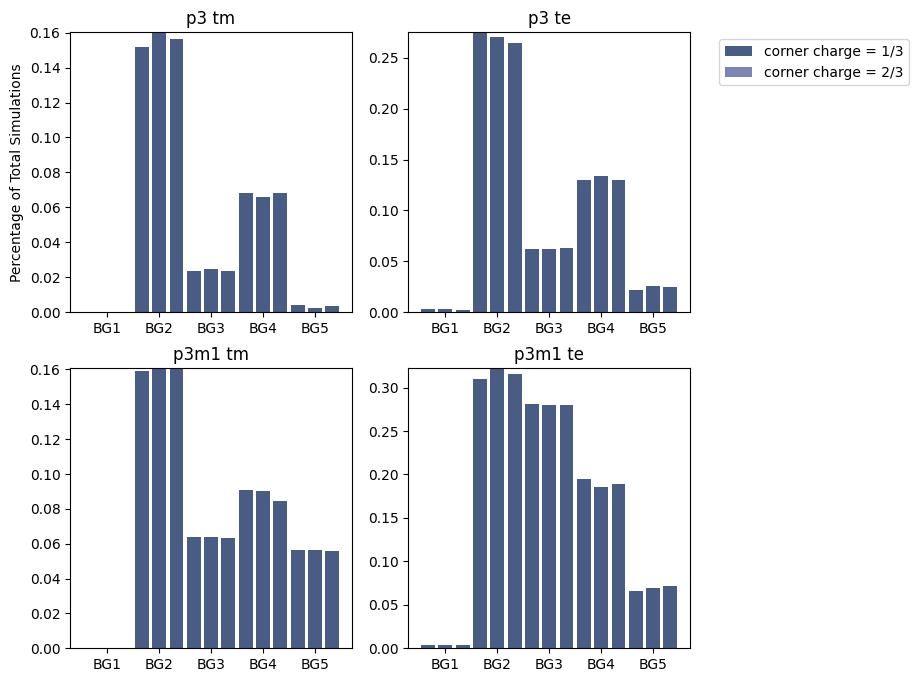

PyObject Text(0.5, 1.0, 'p3m1 te')

In [189]:
figure(figsize=(8, 8))
subplot(2, 2, 1)

colors = [rgb(73, 92, 131), rgb(122, 134, 182), rgb(168, 164, 206), rgb(200, 182, 226)]
push!(colors, 1/2*(colors[1]+colors[2]))
push!(colors, 1/2*(colors[3]+colors[4]))

ylabel("Percentage of Total Simulations")
for (i, (key, val)) in enumerate(sg13_tm_corners)
    for band_num in 1:5
        band = val[band_num] / N
        for (k, j) in enumerate(4:4:11)
            bar(i + (band_num - 1)*3, band[j], bottom = sum(band[1:j-1]), color = colors[k])
        end
    end
end
#xticks([2.5:4:18.5...], ["BG 1", "BG 2", "BG 3", "BG 4", "BG 5"])
title("p3 tm")
xticks(2:3:14, ["BG1", "BG2", "BG3", "BG4", "BG5"])

#xlim(0.5,20.5)

subplot(2, 2, 2)
for (i, (key, val)) in enumerate(sg13_te_corners)
    for band_num in 1:5
        band = val[band_num] / N
        for (k, j) in enumerate(4:4:11)
            if band_num == 1 && i == 1
            bar(i + (band_num - 1)*3, band[j], bottom = sum(band[1:j-1]), color = colors[k], label="corner charge = $(round(Int,j*3/12))/3")
            else               
            bar(i + (band_num - 1)*3, band[j], bottom = sum(band[1:j-1]), color = colors[k])
            end
        end
    end
end
title("p3 te")
xticks(2:3:14, ["BG1", "BG2", "BG3", "BG4", "BG5"])

#xticks([2.5:4:18.5...], ["BG 1", "BG 2", "BG 3", "BG 4", "BG 5"])

bb = legend().get_bbox_to_anchor().inverse_transformed(gca().transAxes)

xOffset = 0.8
bb.x0 += xOffset
bb.x1 += xOffset
gca().legend().set_bbox_to_anchor(bb, transform = gca().transAxes)

subplot(2, 2, 3)
for (i, (key, val)) in enumerate(sg14_tm_corners)
    for band_num in 1:5
        band = val[band_num] / N
        for (k, j) in enumerate(4:4:11)
            if band_num == 1 && i == 1
            bar(i + (band_num - 1)*3, band[j], bottom = sum(band[1:j-1]), color = colors[k], label="corner charge = $(round(Int,j*3/12))/3")
            else               
            bar(i + (band_num - 1)*3, band[j], bottom = sum(band[1:j-1]), color = colors[k])
            end
        end
    end
end
title("p3m1 tm")
xticks(2:3:14, ["BG1", "BG2", "BG3", "BG4", "BG5"])


subplot(2, 2, 4)
for (i, (key, val)) in enumerate(sg14_te_corners)
    for band_num in 1:5
        band = val[band_num] / N
        for (k, j) in enumerate(4:4:11)
            if band_num == 1 && i == 1
            bar(i + (band_num - 1)*3, band[j], bottom = sum(band[1:j-1]), color = colors[k], label="corner charge = $(round(Int,j*3/12))/3")
            else               
            bar(i + (band_num - 1)*3, band[j], bottom = sum(band[1:j-1]), color = colors[k])
            end
        end
    end
end


xticks(2:3:14, ["BG1", "BG2", "BG3", "BG4", "BG5"])
title("p3m1 te")

In [234]:
prod([iszero(x) for x in [0, 2, 3]])

false

In [239]:
sg = 10
sb, brs = compatibility_basis(sg, 2)
for (i, n) in enumerate(sb)
    topo = calc_detailed_topology(n, brs)
    band_summary = BandSummary(topo, 1:n[end], n, brs, indicators(n, brs)...)
    for wyckoff in wyckoffs(sg, 2)[end-1:end]
        prod([iszero(polarizations(band_summary, wyckoff)) for wyckoff in wyckoffs(sg, 2)[end-1:end]]) || continue
        prod([!iszero(corners(band_summary, wyckoff)) for wyckoff in wyckoffs(sg, 2)[end-1:end]]) || continue

        println(corners(band_summary, wyckoffs(sg, 2)[end]))
        println(corners(band_summary, wyckoffs(sg, 2)[end-1]))
        println()
    end
end

0.25
0.75

0.25
0.75

0.75
0.25

0.75
0.25

0.25
0.75

0.25
0.75

0.25
0.75

0.25
0.75

0.75
0.25

0.75
0.25

0.25
0.75

0.25
0.75

0.75
0.25

0.75
0.25

0.25
0.75

0.25
0.75

0.75
0.25

0.75
0.25

0.75
0.25

0.75
0.25

0.25
0.75

0.25
0.75

0.75
0.25

0.75
0.25



In [223]:
sg = 10
sb, brs = compatibility_basis(sg, 2)
for (i, n) in enumerate(sb)
    topo = calc_detailed_topology(n, brs)
    band_summary = BandSummary(topo, 1:n[end], n, brs, indicators(n, brs)...)
    for wyckoff in wyckoffs(sg, 2)[end-1:end]
        (iszero(polarizations(band_summary, wyckoff)) && !iszero(corners(band_summary, wyckoff))) || continue
        #!iszero(corners(band_summary, wyckoff)) || continue

        println(wyckoff, "   ", corners(band_summary, wyckoff)*4)
    end
end

1b: [1/2, 1/2]   2.0
1b: [1/2, 1/2]   3.0
1a: [0, 0]   1.0
1b: [1/2, 1/2]   1.0
1a: [0, 0]   3.0
1b: [1/2, 1/2]   3.0
1a: [0, 0]   1.0
1b: [1/2, 1/2]   3.0
1a: [0, 0]   1.0
1b: [1/2, 1/2]   2.0
1b: [1/2, 1/2]   2.0
1b: [1/2, 1/2]   1.0
1a: [0, 0]   3.0
1b: [1/2, 1/2]   3.0
1a: [0, 0]   1.0
1a: [0, 0]   2.0
1a: [0, 0]   2.0
1b: [1/2, 1/2]   1.0
1a: [0, 0]   3.0
1b: [1/2, 1/2]   3.0
1a: [0, 0]   1.0
1b: [1/2, 1/2]   1.0
1a: [0, 0]   3.0
1b: [1/2, 1/2]   1.0
1a: [0, 0]   3.0
1a: [0, 0]   2.0
1b: [1/2, 1/2]   3.0
1a: [0, 0]   1.0
1b: [1/2, 1/2]   1.0
1a: [0, 0]   3.0


In [5]:
for sg in [2, 6, 9:17...]
    println("Analyzing Corner Charges in Spacegroup $sg"); flush(stdout)
    corner_data = load("./symeigs/sg$sg-corner-data.jld2")
    for (key, val) in corner_data["cum_wyckoff_degeneracy"]
        cum_wyckoff_degeneracy[key] = val
    end
end
    

Analyzing Corner Charges in Spacegroup 2
Analyzing Corner Charges in Spacegroup 6
Analyzing Corner Charges in Spacegroup 9
Analyzing Corner Charges in Spacegroup 10
Analyzing Corner Charges in Spacegroup 11
Analyzing Corner Charges in Spacegroup 12
Analyzing Corner Charges in Spacegroup 13
Analyzing Corner Charges in Spacegroup 14
Analyzing Corner Charges in Spacegroup 15
Analyzing Corner Charges in Spacegroup 16
Analyzing Corner Charges in Spacegroup 17


In [14]:
cum_wyckoff_degeneracy[(2, 1, "tm")]

5-element Vector{Vector}:
 Integer[2966, 0, 0, 0, 0, 0]
 Integer[2958, 2958, 2958, 2958, 0, 0]
 Integer[4217, 0, 0, 0, 0, 0]
 Integer[3260, 3260, 3260, 3260, 0, 0]
 Integer[4078, 0, 0, 0, 0, 0]

In [117]:
summaries = loaded_data["summariesv"][10][1:10]
for wyckoff in sg_wyckoffs[2]
    corner_charge = corners.(summaries, Ref(wyckoff))
    polarization = polarizations.(summaries, Ref(wyckoff))
    count(x -> corner_charge[findall(x -> isapprox(x, zeros(2)), polarization)])
end

[0.25]
[0.0]
[0.25, 0.75, 0.25]
[0.25, 0.75, 0.25, 0.75, 0.25]


In [85]:
sg = 2
sb, brs = compatibility_basis(sg, 2)
for (i, n) in enumerate(sb)
    topo = calc_detailed_topology(n, brs)
    band_summary = BandSummary(topo, 1:n[end], n, brs, indicators(n, brs)...)
    for wyckoff in wyckoffs(sg, 2)[end-3:end]
        (iszero(polarizations(band_summary, wyckoff)) && !iszero(corners(band_summary, wyckoff))) || continue
        #iszero(corners(band_summary, wyckoff)) && continue
        println(band_summary.topology)
        #!iszero(corners(band_summary, wyckoff)) && break
    end
end

NONTRIVIAL
NONTRIVIAL
NONTRIVIAL
NONTRIVIAL
NONTRIVIAL
NONTRIVIAL
NONTRIVIAL
NONTRIVIAL


In [11]:
loaded_data_eps2 = load("symeigs/output/sg10/eps2/te/sg10-epsid2-res64-te.jld2")
loaded_data_eps3 = load("symeigs/output/sg10/eps3/te/sg10-epsid3-res64-te.jld2")

Dict{String, Any} with 5 entries:
  "symeigsdv"     => Dict{String, Vector{Vector{ComplexF64}}}[Dict("X"=>[[1.0+0…
  "summariesv"    => Vector{BandSummary}[[1-band (nontrivial): [X₁, M₂, Γ₁], 1-…
  "brs"           => BandRep[[1, 1, 0, 0, 1, 1, 1, 0, 2], [1, 1, 1, 1, 0, 0, 0,…
  "cumsummariesv" => Vector{BandSummary}[[1-band (nontrivial): [X₁, M₂, Γ₁], 2-…
  "lgirsd"        => Dict{String, Vector{LGIrrep{2}}}("X"=>[LGIrrep{2}("X₁", [1…

In [125]:
sum(loaded_data_eps3["summariesv"][132][1:2])

3-band BandSummary:
 bands:      1:3
 n:          2X₁+X₂, M₂+M₃M₄, 3Γ₁
 topology:   fragile

In [91]:
cumsumarriesv_eps2 = loaded_data_eps2["cumsummariesv"];
cumsumarriesv_eps3 = loaded_data_eps3["cumsummariesv"];

In [40]:
id_eps = 3
sg = 10
mode = "te"

dir = "./symeigs/output/sg$(sg)/eps$(id_eps)/$(mode)/"

brs = bandreps(sg, 2)
summariesv = []
for (i, id) in enumerate(fragiles_eps3)
    id′ = id + 10000*(id_eps-1)
    symeigsd, lgd = read_symdata("dim2-sg$sg-$(id′)-res64-$mode", dir = dir)
    fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(mode)))
    lgirsd = pick_lgirreps(lgd)
    summaries = analyze_symmetry_data(symeigsd, lgirsd, brs)
    
    push!(summariesv, summaries)
end


In [46]:
for summaries in summariesv 
    println((summaries[1] + summaries[2]).topology)
end

FRAGILE
FRAGILE
FRAGILE
FRAGILE
FRAGILE
FRAGILE
FRAGILE
FRAGILE
FRAGILE
FRAGILE
FRAGILE
FRAGILE
FRAGILE
FRAGILE


In [16]:
fragiles_eps2 = findall(x -> x[2].topology == TopologyKind(2), cumsumarriesv_eps2 )
fragiles_eps3 = findall(x -> (length(x) >=2) && x[2].topology == TopologyKind(2), cumsumarriesv_eps3 );

In [26]:
loaded_eps_data = load("symeigs/output/sg10/eps1/te/sg10-epsid1-res64-te-input.jld2")
isovalv = loaded_eps_data["isovalv"]
Rsv = loaded_eps_data["Rsv"]
flatv = loaded_eps_data["flatv"];

N = 100    
xyz = range(-.5, .5, length=100)

-0.5:0.010101010101010102:0.5

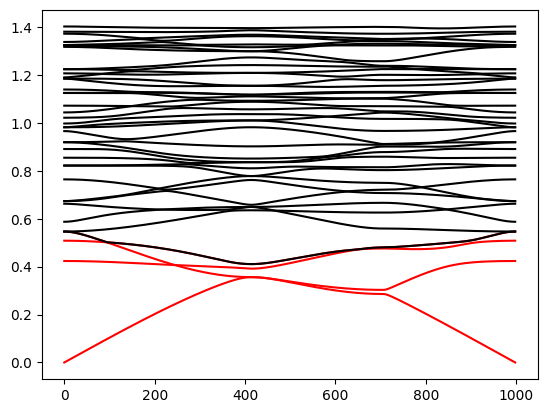

37-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae82ca0>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae82d90>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae82e50>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae82f10>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae82fd0>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae0a0d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae0a190>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae0a250>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae0a310>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae0a3d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae0a490>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae0a550>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae0a610>
 ⋮
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae0afd0>
 PyObject <matplotlib.lines.Line2D object at 0x7fc70ae100d0>
 PyObject <matplotlib.lines.Line2D object at 0

In [14]:
#bands = readdlm("./dispersions/output/dim2-sg10-20132-res192-te-dispersion.out", ',')
plot(bands[:, 6:(3 .+ 6)], color="red")
plot(bands[:, (3 .+ 6):end], color="black")
#ylim(0.46, 0.48)
#xlim(600, 800)

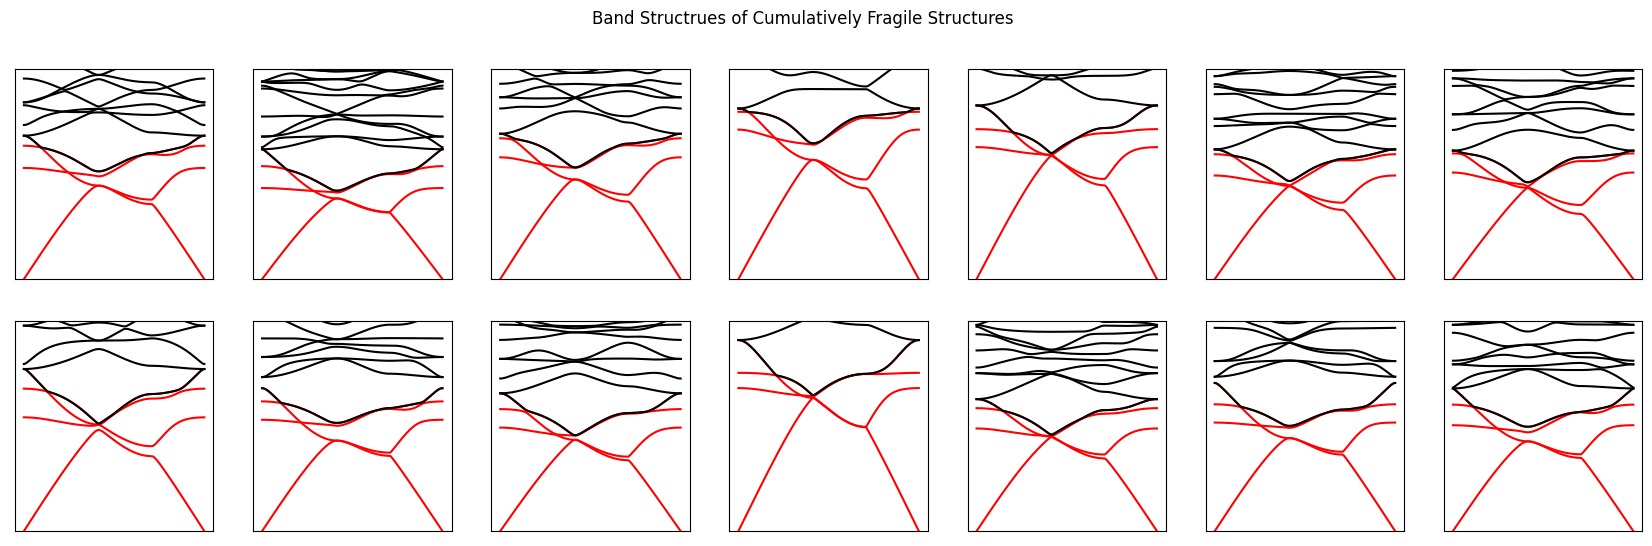

PyObject Text(0.5, 0.98, 'Band Structrues of Cumulatively Fragile Structures')

In [4]:
figure(figsize=(3*7, 3*2))
for (i, id) in enumerate([20132,20772,21152,21548,22488,23742,25243,27021,27163,28064,28159,28545,29229,29939])
    subplot(2, 7, i)
    bands = readdlm("./dispersions/output/dim2-sg10-$id-res192-te-dispersion.out", ',');
    plot(bands[:, 6:(3 .+ 6)], color="red")
    plot(bands[:, (3 .+ 6):end], color="black")

    ylim(0, 0.8)
    yticks([])
    xticks([])
end    
suptitle("Band Structrues of Cumulatively Fragile Structures")


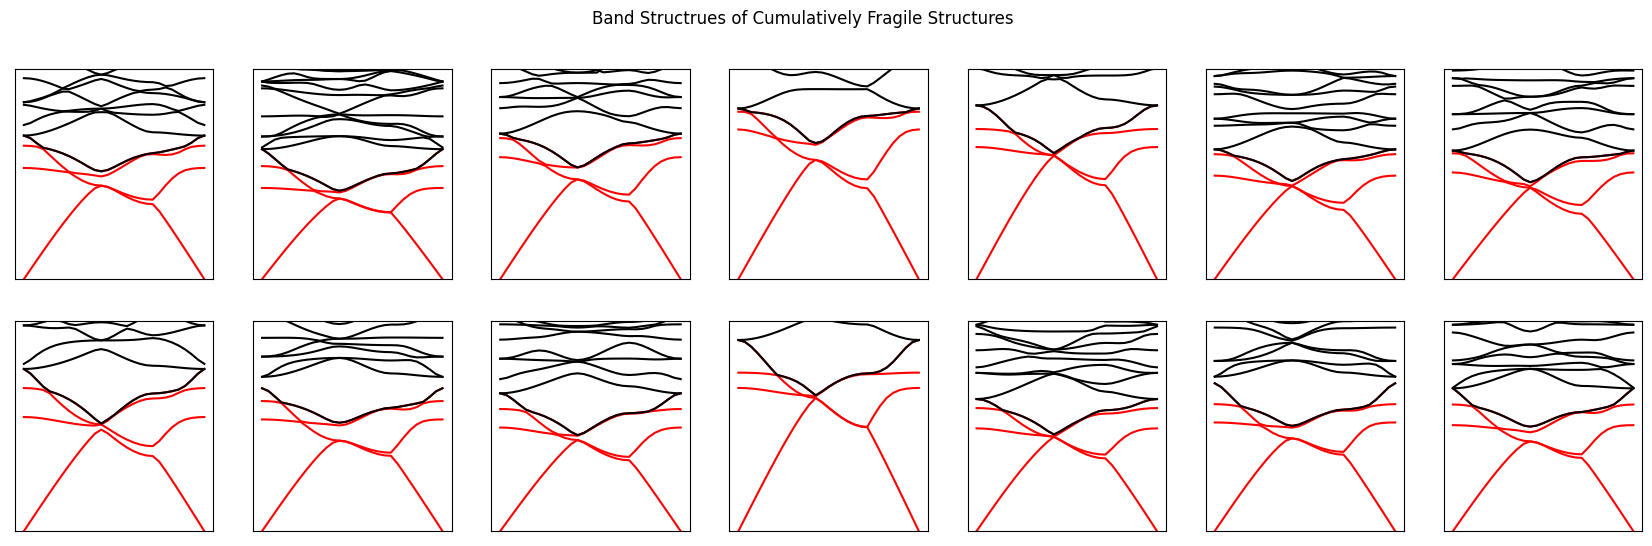

In [122]:
figure(figsize=(3*7, 3*2))
for (i, id) in enumerate((fragiles_eps3 .+ (10000)*2))
    subplot(2, 7, i)
    bands = readdlm("./dispersions/output/dim2-sg10-$id-res64-te-dispersion.out", ',');
    plot(bands[:, 6:(3 .+ 6)], color="red")
    plot(bands[:, (3 .+ 6):end], color="black")

    ylim(0, 0.8)
    yticks([])
    xticks([])
end    
suptitle("Band Structrues of Cumulatively Fragile Structures")
savefig("CumBands.pdf")

In [66]:
bands = readdlm("./dispersions/output/dim2-sg10-20132-res64-te-dispersion.out", ',');

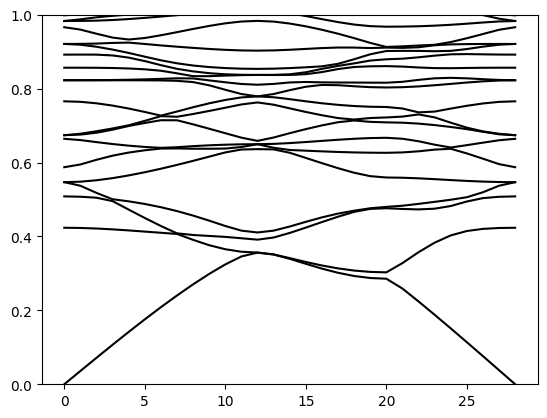

(0.0, 1.0)

In [73]:
plot(bands[:, 6:end], color="black")
ylim(0, 1)

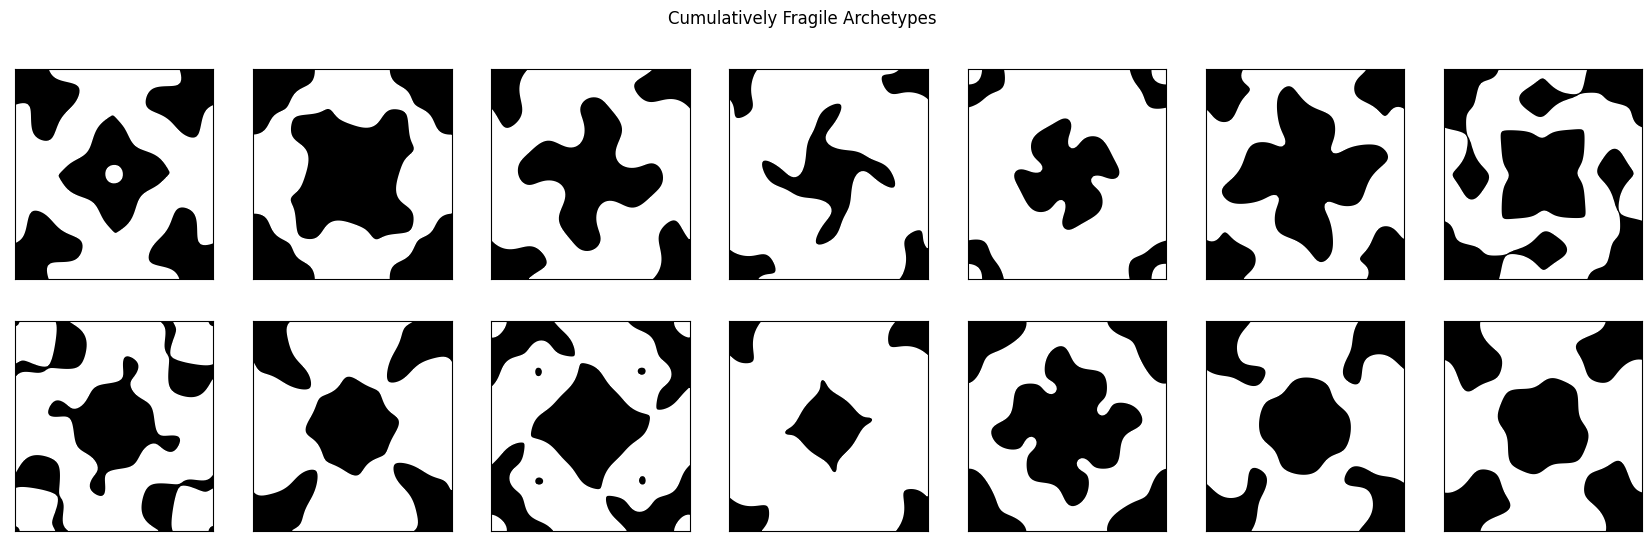

In [37]:
figure(figsize=(3*7, 3*2))
for (i, id) in enumerate(fragiles_eps3)
    subplot(2, 7, i)
    
    flat, Rs, isoval = [flatv[id], Rsv[id], isovalv[id]]
    
    X = broadcast((x,y) -> x*Rs[1][1] + y*Rs[2][1], reshape(xyz,(1,N)), reshape(xyz, (N,1)))
    Y = broadcast((x,y) -> x*Rs[1][2] + y*Rs[2][2], reshape(xyz,(1,N)), reshape(xyz, (N,1)))

    vals = Crystalline.calcfouriergridded(xyz, flat, 100)

    contourf(X,Y,vals; levels=(-1e12, isoval, 1e12), cmap=plt.get_cmap("gray",2))
    contour(X,Y,vals,levels=(isoval,), colors="w", linestyles="solid")
    xticks([])
    yticks([])
end
suptitle("Cumulatively Fragile Archetypes")
savefig("CummulativelyFragile.pdf")

In [3]:
trivial_count =  Dict{Tuple{Integer, Integer, String}, Vector{Integer}}();
stable_count =  Dict{Tuple{Integer, Integer, String}, Vector{Integer}}();
fragile_count =  Dict{Tuple{Integer, Integer, String}, Vector{Integer}}();

cum_trivial_count = Dict{Tuple{Integer, Integer, String}, Vector{Integer}}();
cum_fragile_count = Dict{Tuple{Integer, Integer, String}, Vector{Integer}}();
cum_stable_count = Dict{Tuple{Integer, Integer, String}, Vector{Integer}}();

num_bands_count = Dict{Tuple{Integer, Integer, String}, Vector{Vector{Integer}}}();

In [4]:
for sg in [2, 6, 9:17...]
    println("Loading sg: ", sg)
    sg_data = load("./symeigs/sg$sg-data.jld2")
    for (key, val) in sg_data["trivial_count"]
        trivial_count[key] = val
    end
    for (key, val) in sg_data["stable_count"]
        stable_count[key] = val
    end
    for (key, val) in sg_data["fragile_count"]
        fragile_count[key] = val
    end
    for (key, val) in sg_data["cum_trivial_count"]
        cum_trivial_count[key] = val 
    end
    for (key, val) in sg_data["cum_stable_count"]
        cum_stable_count[key] = val 
    end
    for (key, val) in sg_data["cum_fragile_count"]
        cum_fragile_count[key] = val 
    end
    for (key, val) in sg_data["num_bands"]
        num_bands_count[key] = val 
    end
end

Loading sg: 2
Loading sg: 6
Loading sg: 9
Loading sg: 10
Loading sg: 11
Loading sg: 12
Loading sg: 13
Loading sg: 14
Loading sg: 15
Loading sg: 16
Loading sg: 17


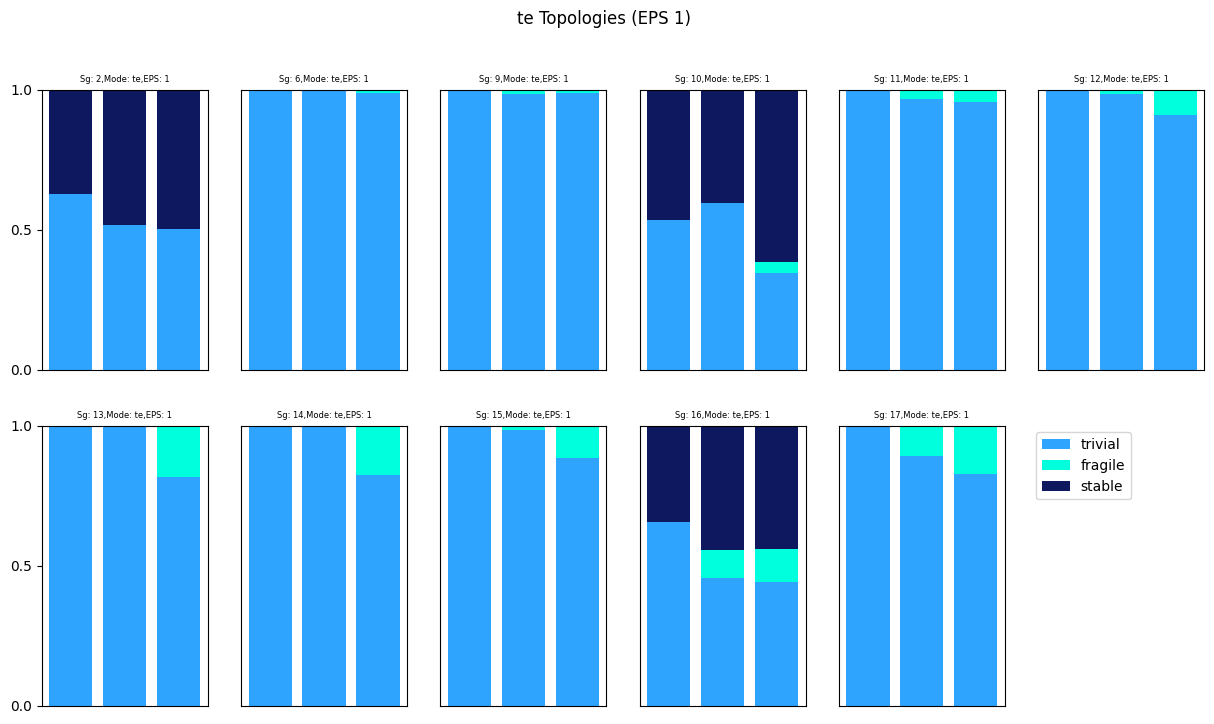

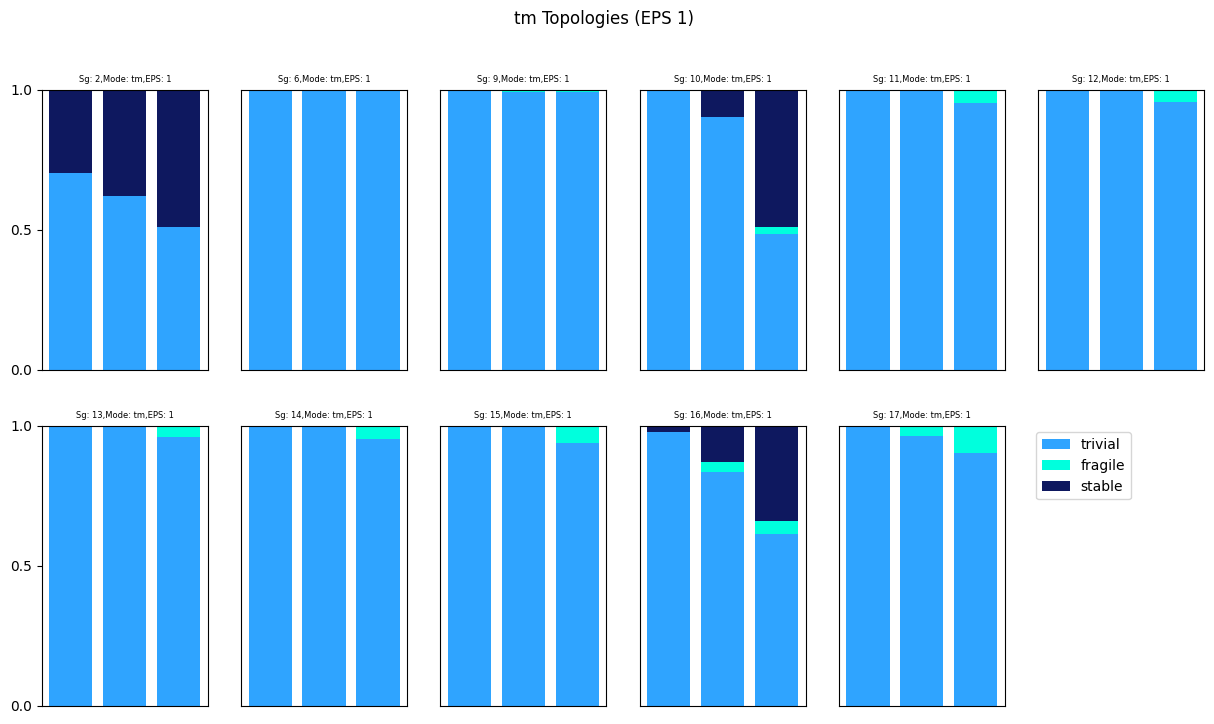

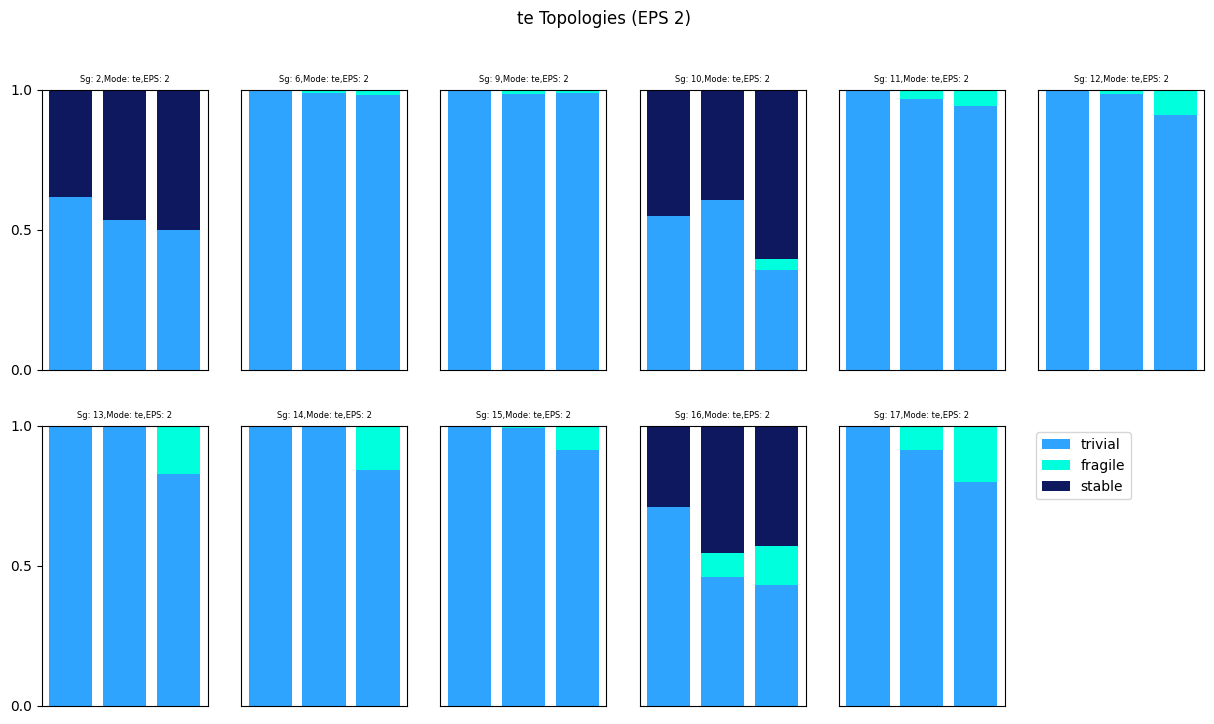

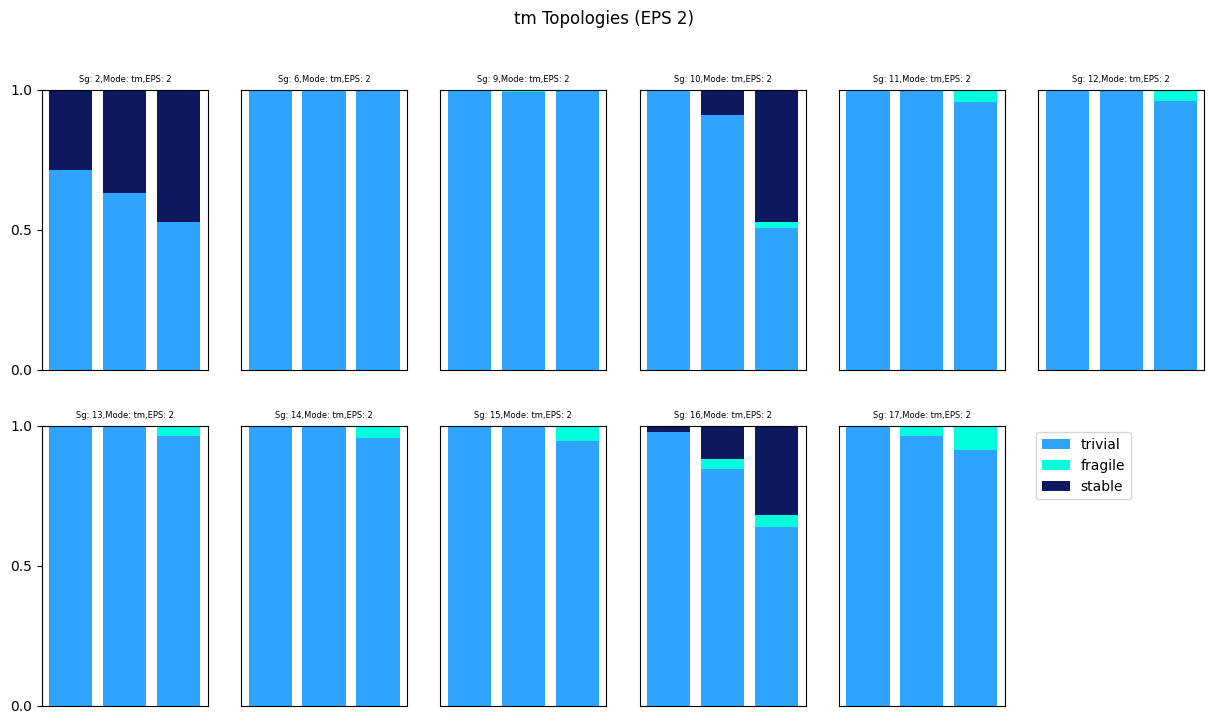

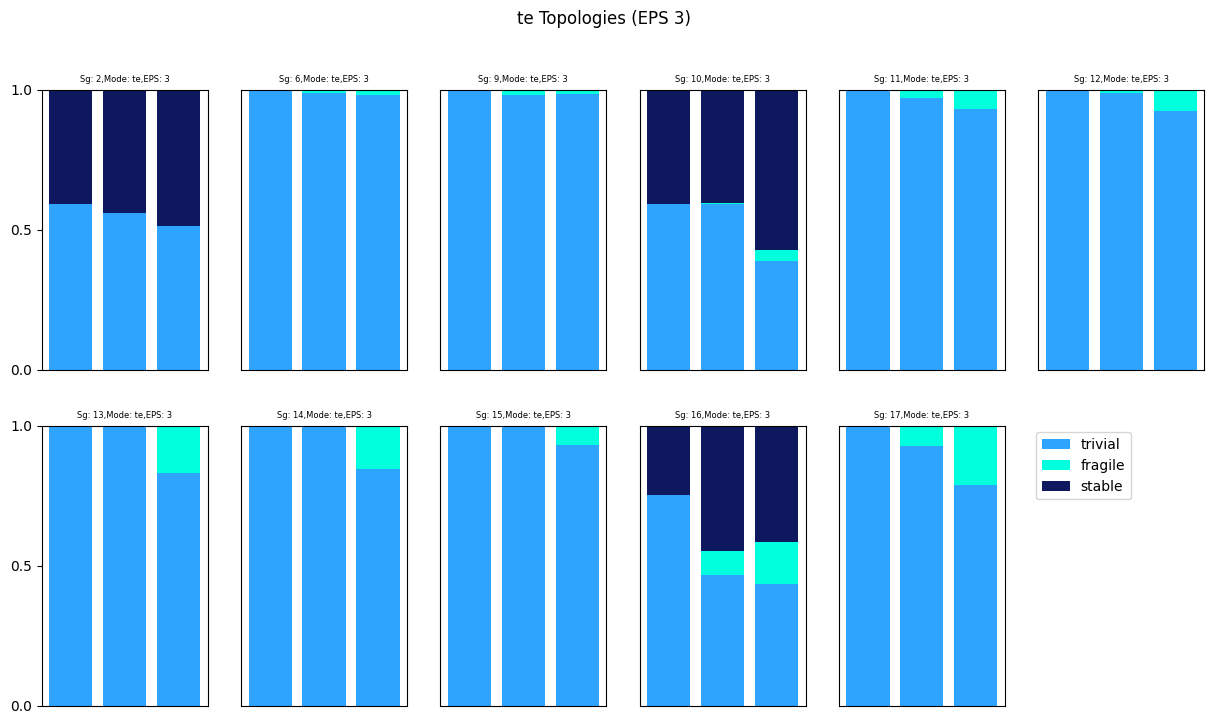

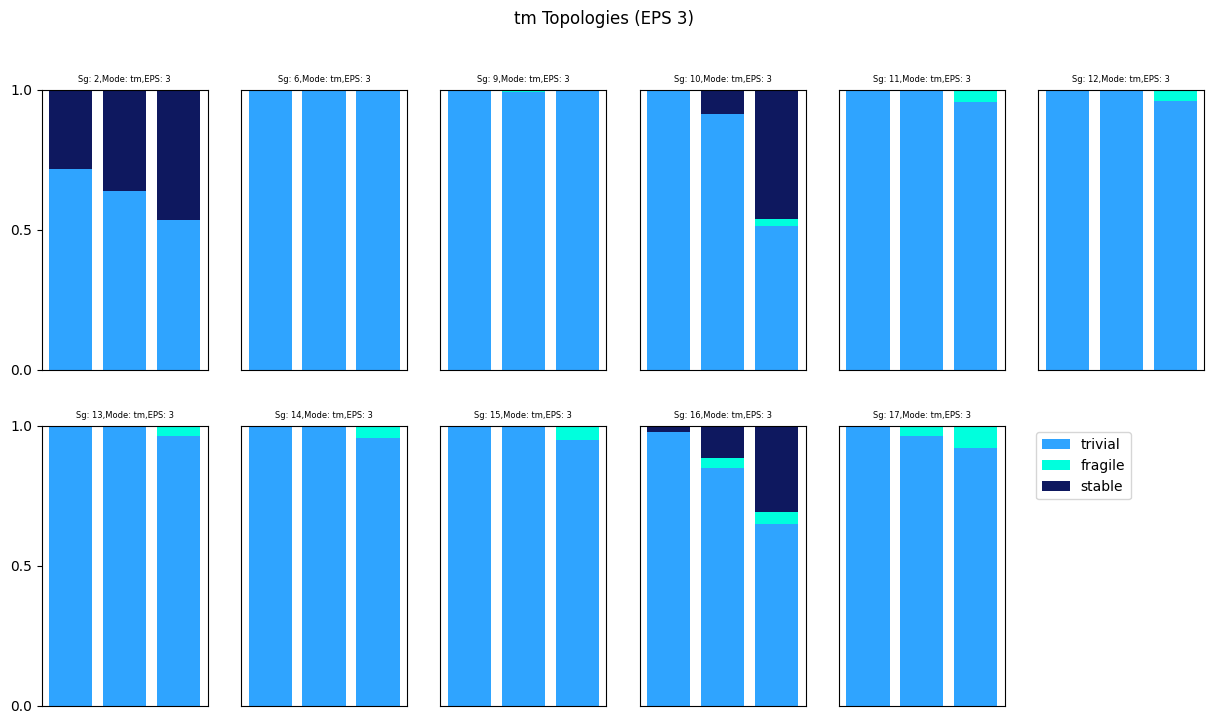

In [10]:
sgs = [2, 6, 9:17...]

band_set_range = 1:3

for id_eps in 1:3
    for mode in ["te", "tm"]
        fig, (axes) = subplots(2, 6, figsize=(15, 8), gridspec_kw=Dict("width_ratios" => ones(Int, 6), "height_ratios" => [1, 1]))
        for (sg_idx, sg) in enumerate(sgs)
            row = sg_idx > 6 ? 2 : 1
            col = rem(sg_idx, 6) 
            col = col == 0 ? 6 : col
            ax = axes[row, col]
            ax.set_title("Sg: $sg,Mode: $(mode),EPS: $(id_eps)", size=6)

            trivial_data = float.(trivial_count[(sg, id_eps, mode)][band_set_range])
            fragile_data = float.(fragile_count[(sg, id_eps, mode)][band_set_range])
            stable_data = float.(stable_count[(sg, id_eps, mode)][band_set_range])

            totals = trivial_data + fragile_data + stable_data
            trivial_data .*= 1 ./ totals
            fragile_data .*= 1 ./ totals
            stable_data .*= 1 ./ totals

            ax.bar(band_set_range, trivial_data, color = [47/255, 164/255, 255/255], label="trivial")
            ax.bar(band_set_range, fragile_data, bottom = trivial_data, color=[0/255, 255/255, 221/255], label="fragile")
            ax.bar(band_set_range, stable_data, bottom = trivial_data + fragile_data, color=[14/255, 24/255, 95/255], label="stable")
            ax.set_ylim(0, 1)

            (col == 5 && row == 2) && ax.legend(loc= "lower right")
            col == 1 ? ax.set_yticks([0, 0.5, 1]) : ax.set_yticks([])
            ax.set_xticks([])

            if (col == 5 && row == 2)
                bb = ax.legend().get_bbox_to_anchor().inverse_transformed(ax.transAxes)

                xOffset = 0.8
                bb.x0 += xOffset
                bb.x1 += xOffset
                ax.legend().set_bbox_to_anchor(bb, transform = ax.transAxes)
            end

        end
        suptitle("$(mode) Topologies (EPS $(id_eps))")
        delaxes(axes[2, 6])
        savefig("Topologies-$(mode)-$(id_eps).pdf")
    end
end

In [64]:
load("./symeigs/sg10-corner-data.jld2")["cum_wyckoff_degeneracy"][(10, 2, "te")]

5-element Vector{Vector{Integer}}:
 [3526, 2, 0, 0, 0, 0]
 [4421, 2248, 0, 0, 0, 0]
 [4051, 2222, 0, 0, 0, 0]
 [4378, 1125, 0, 0, 0, 0]
 [4449, 1357, 0, 0, 0, 0]

In [67]:
load("./symeigs/sg10-corner-data.jld2")["cum_wyckoff_degeneracy"][(10, 1, "te")]

5-element Vector{Vector{Integer}}:
 [3467, 2, 0, 0, 0, 0]
 [4449, 2177, 0, 0, 0, 0]
 [4102, 1971, 0, 0, 0, 0]
 [4125, 1182, 0, 0, 0, 0]
 [4220, 1373, 0, 0, 0, 0]

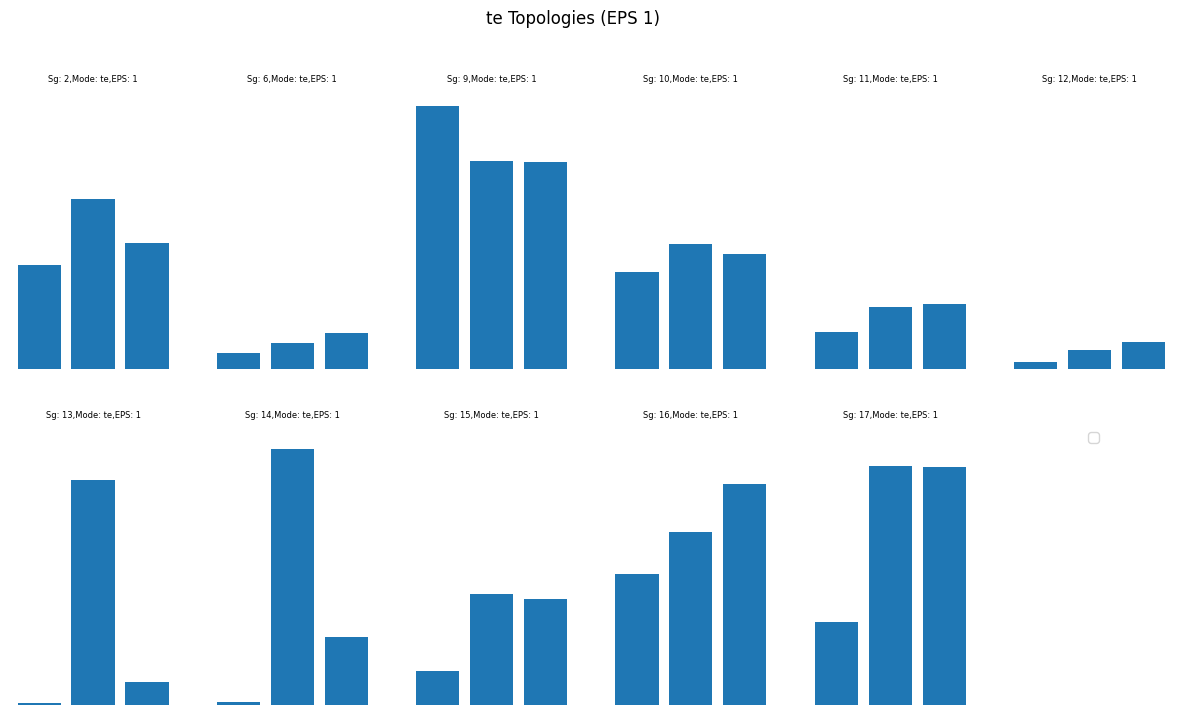

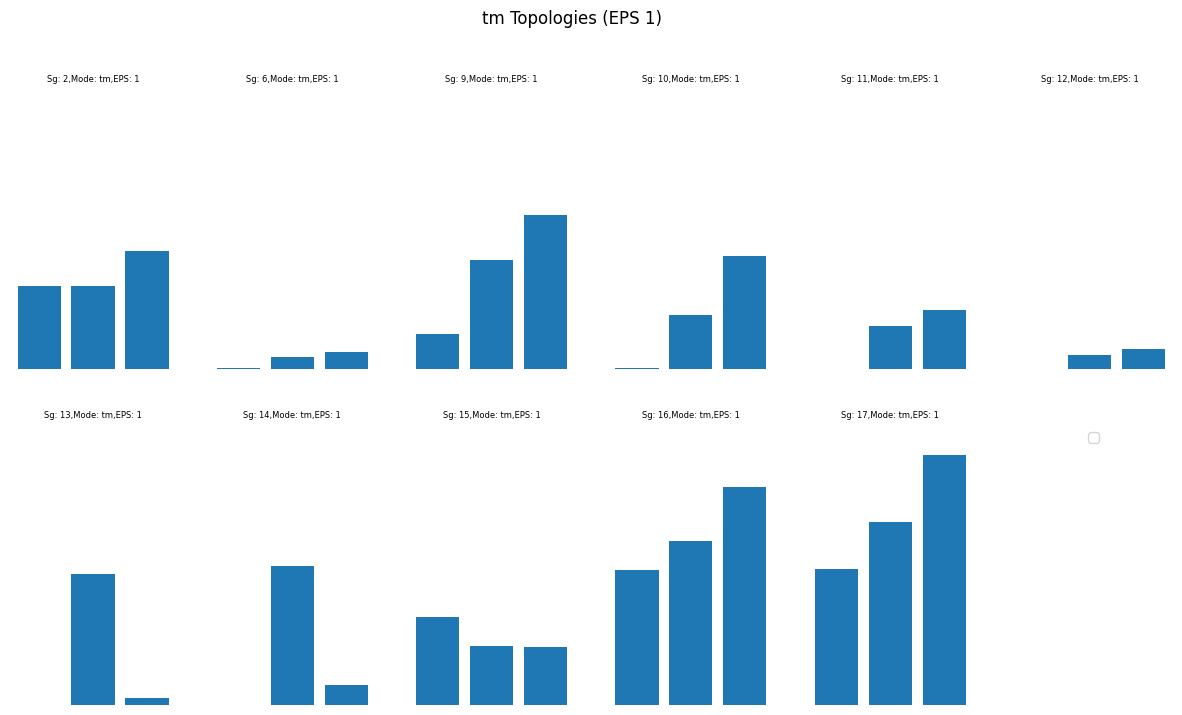

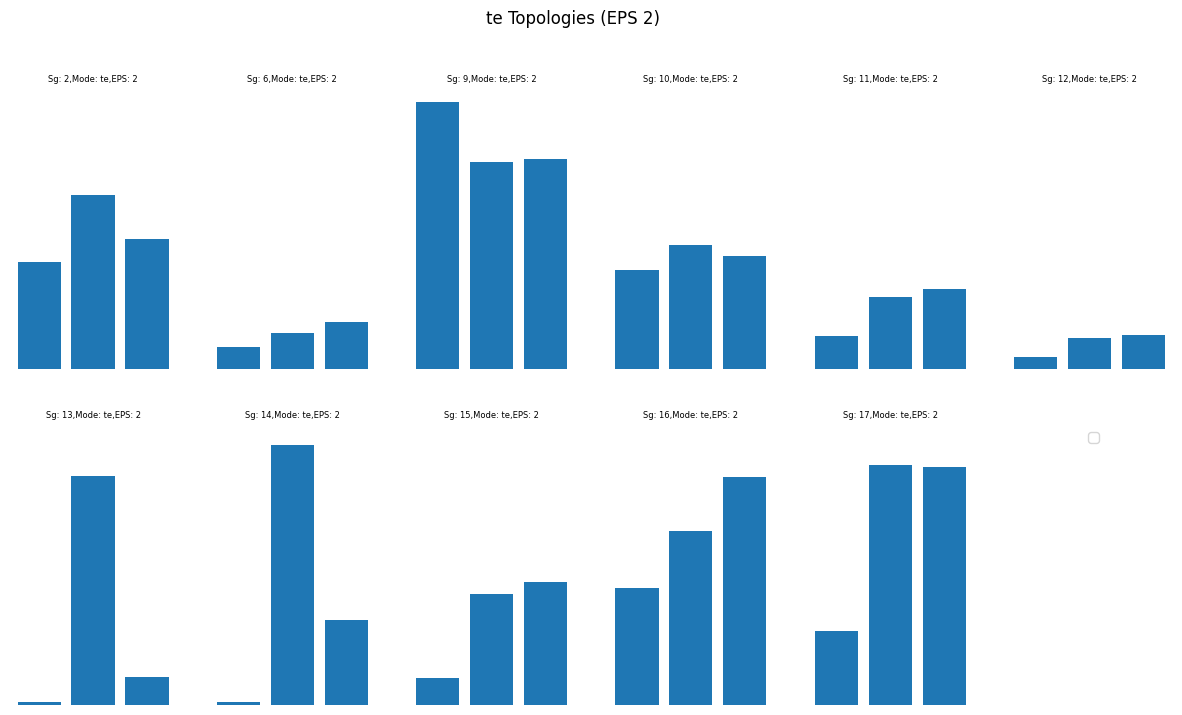

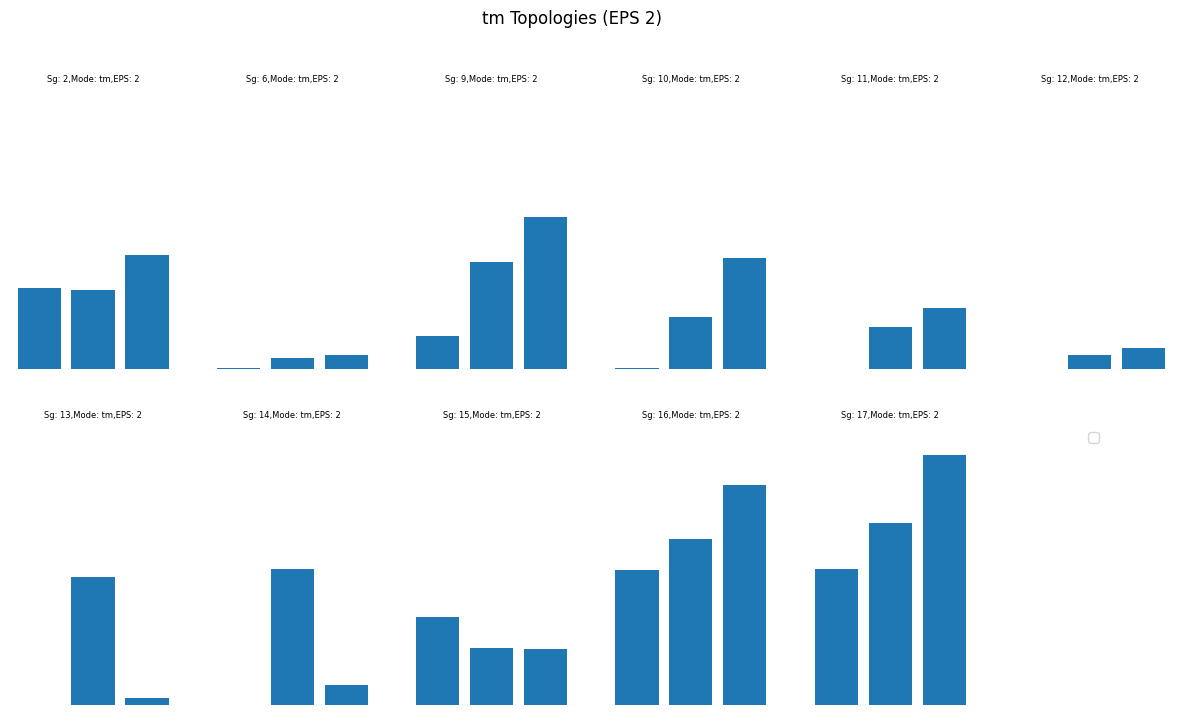

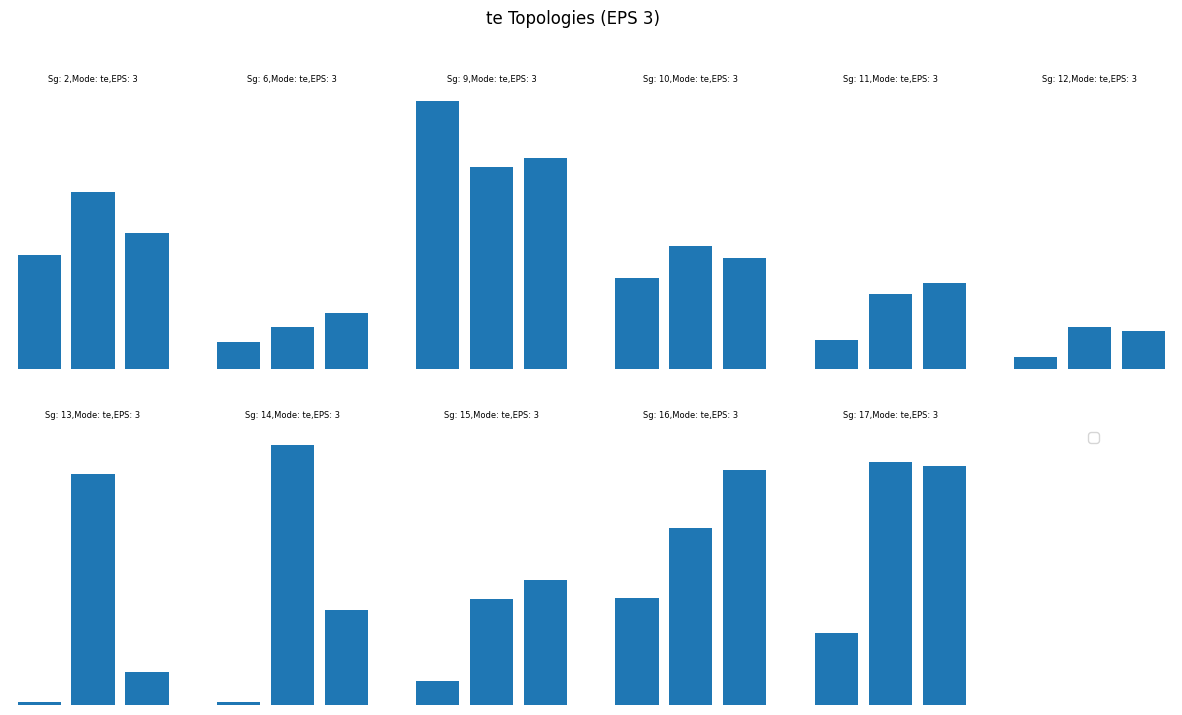

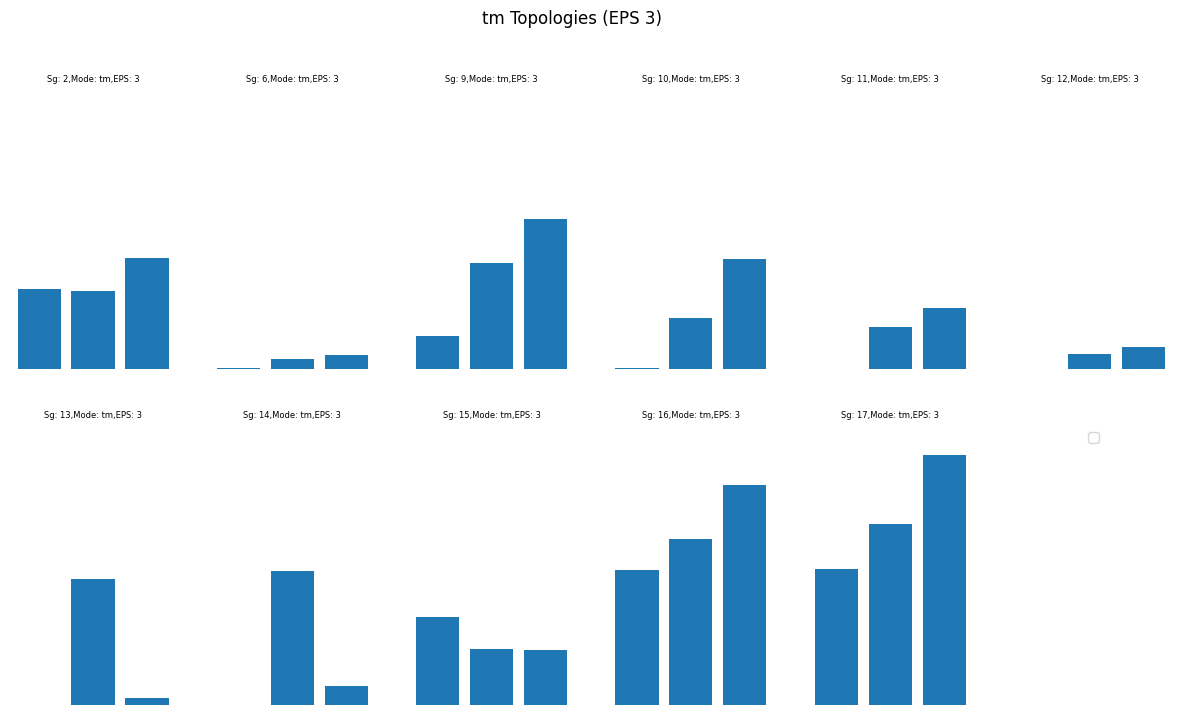

[3717, 6087, 4505]
[548, 880, 1091]
[9410, 7416, 7382]
[3467, 4449, 4102]
[1311, 2190, 2244]
[257, 692, 928]
[83, 8053, 805]
[98, 9137, 2438]
[1216, 3964, 3781]
[4668, 6152, 7839]
[2954, 8481, 8257]
[2966, 2958, 4217]
[46, 420, 568]
[1238, 3901, 5498]
[47, 1934, 4052]
[7, 1548, 2093]
[13, 500, 701]
[8, 4680, 254]
[7, 4957, 717]
[3152, 2111, 2061]
[4827, 5868, 7762]
[4874, 6534, 8880]
[3830, 6214, 4646]
[780, 1241, 1517]
[9532, 7376, 7482]
[3526, 4421, 4051]
[1177, 2550, 2806]
[415, 1099, 1206]
[124, 8175, 1011]
[113, 9270, 3037]
[962, 3938, 4379]
[4162, 6181, 8100]
[2636, 8507, 8242]
[2891, 2839, 4063]
[50, 384, 488]
[1191, 3832, 5432]
[48, 1864, 3966]
[7, 1505, 2156]
[12, 503, 739]
[6, 4561, 245]
[8, 4851, 697]
[3148, 2034, 1985]
[4823, 5932, 7853]
[4872, 6489, 8892]
[4081, 6306, 4869]
[949, 1461, 1863]
[9577, 7213, 7534]
[3260, 4380, 3968]
[1029, 2672, 3056]
[442, 1504, 1356]
[120, 8237, 1178]
[114, 9295, 3396]
[865, 3761, 4428]
[3822, 6284, 8319]
[2576, 8575, 8259]
[2846, 2772, 3961

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
sys:1: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
sys:1: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
sys:1: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in 

In [59]:
for id_eps in 1:3
    for mode in ["te", "tm"]
        fig, (axes) = subplots(2, 6, figsize=(15, 8), gridspec_kw=Dict("width_ratios" => ones(Int, 6), "height_ratios" => [1, 1]))
        for (sg_idx, sg) in enumerate(sgs)
            row = sg_idx > 6 ? 2 : 1
            col = rem(sg_idx, 6) 
            col = col == 0 ? 6 : col
            ax = axes[row, col]
            ax.set_title("Sg: $sg,Mode: $(mode),EPS: $(id_eps)", size=6)

            sg_eps_mode_corner_data = [x[1] for x in load("./symeigs/sg$sg-corner-data.jld2")["cum_wyckoff_degeneracy"][(sg, id_eps, mode)]][band_set_range]
            println(sg_eps_mode_corner_data)
            sg_eps_mode_corner_data = float.(sg_eps_mode_corner_data)
            trivial_data = float.(trivial_count[(sg, id_eps, mode)][band_set_range])
            fragile_data = float.(fragile_count[(sg, id_eps, mode)][band_set_range])
            stable_data = float.(stable_count[(sg, id_eps, mode)][band_set_range])

            totals = trivial_data + fragile_data + stable_data
            sg_eps_mode_corner_data .*= 1 ./ totals
            
            ax.bar(1:3, sg_eps_mode_corner_data)
                        ax.set_ylim(0, 1)
            ax.axis("off")


            (col == 5 && row == 2) && ax.legend(loc= "lower right")
            col == 1 ? ax.set_yticks([0, 0.5, 1]) : ax.set_yticks([])
            ax.set_xticks([])

            if (col == 5 && row == 2)
                bb = ax.legend().get_bbox_to_anchor().inverse_transformed(ax.transAxes)

                xOffset = 0.8
                bb.x0 += xOffset
                bb.x1 += xOffset
                ax.legend().set_bbox_to_anchor(bb, transform = ax.transAxes)
            end

        end
        suptitle("$(mode) Topologies (EPS $(id_eps))")
        delaxes(axes[2, 6])
        savefig("Corners-$(mode)-$(id_eps).pdf")
    end
end

In [51]:
totals


3-element Vector{Float64}:
 10000.0
 10000.0
 10000.0

In [141]:
sg2_tm_trivial = float.(cum_trivial_count[(2, 1, "tm")])
sg2_tm_stable = float.(cum_stable_count[(2, 1, "tm")])
sg2_tm_fragile = float.(cum_fragile_count[(2, 1, "tm")])

sg2_tm_tot = sg2_tm_trivial + sg2_tm_stable + sg2_tm_fragile
sg2_tm_stable .*= 1 ./ sg2_tm_tot

sg10_tm_trivial = float.(cum_trivial_count[(10, 1, "tm")])
sg10_tm_stable = float.(cum_stable_count[(10, 1, "tm")])
sg10_tm_fragile = float.(cum_fragile_count[(10, 1, "tm")])

sg10_tm_tot = sg10_tm_trivial + sg10_tm_stable + sg10_tm_fragile
sg10_tm_stable .*= 1 ./ sg10_tm_tot

sg16_tm_trivial = float.(cum_trivial_count[(16, 1, "tm")])
sg16_tm_stable = float.(cum_stable_count[(16, 1, "tm")])
sg16_tm_fragile = float.(cum_fragile_count[(16, 1, "tm")])

sg16_tm_tot = sg16_tm_trivial + sg16_tm_stable + sg16_tm_fragile
sg16_tm_stable .*= 1 ./ sg16_tm_tot

5-element Vector{Float64}:
 0.023802380238023804
 0.1098879103282626
 0.2600160256410256
 0.2707769423558897
 0.3185831828215934

In [142]:
sg2_te_trivial = float.(cum_trivial_count[(2, 1, "te")])
sg2_te_stable = float.(cum_stable_count[(2, 1, "te")])
sg2_te_fragile = float.(cum_fragile_count[(2, 1, "te")])

sg2_te_tot = sg2_te_trivial + sg2_te_stable + sg2_te_fragile
sg2_te_stable .*= 1 ./ sg2_te_tot

sg10_te_trivial = float.(cum_trivial_count[(10, 1, "te")])
sg10_te_stable = float.(cum_stable_count[(10, 1, "te")])
sg10_te_fragile = float.(cum_fragile_count[(10, 1, "te")])

sg10_te_tot = sg10_te_trivial + sg10_te_stable + sg10_te_fragile
sg10_te_stable .*= 1 ./ sg10_te_tot

sg16_te_trivial = float.(cum_trivial_count[(16, 1, "te")])
sg16_te_stable = float.(cum_stable_count[(16, 1, "te")])
sg16_te_fragile = float.(cum_fragile_count[(16, 1, "te")])

sg16_te_tot = sg16_te_trivial + sg16_te_stable + sg16_te_fragile
sg16_te_stable .*= 1 ./ sg16_te_tot

5-element Vector{Float64}:
 0.34595731890592124
 0.26530202689143084
 0.4087708710521022
 0.38054882970137205
 0.4486388017407145

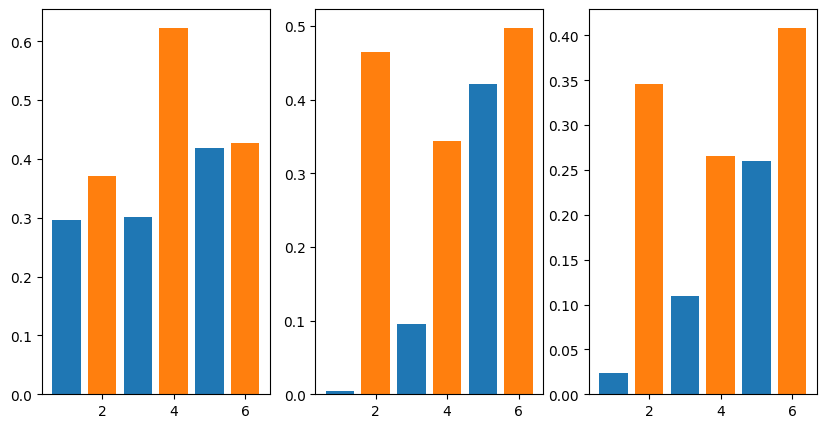

In [145]:
figure(figsize=(10, 5))
subplot(1, 3, 1)
bar(1:2:5, sg2_tm_stable[1:3])
bar(2:2:6, sg2_te_stable[1:3])

subplot(1, 3, 2)
bar(1:2:5, sg10_tm_stable[1:3])
bar(2:2:6, sg10_te_stable[1:3])

subplot(1, 3, 3)
bar(1:2:5, sg16_tm_stable[1:3])
bar(2:2:6, sg16_te_stable[1:3])
savefig("StableTopologyBar.pdf")

In [129]:
trivial_count

Dict{Tuple{Integer, Integer, String}, Vector{Integer}} with 66 entries:
  (15, 1, "tm") => [10000, 9995, 9366, 9392, 9125]
  (6, 1, "te")  => [9891, 9405, 8419, 7013, 5430]
  (12, 3, "te") => [9998, 9845, 9113, 8862, 8341]
  (15, 2, "tm") => [10000, 9996, 9451, 9471, 9281]
  (6, 2, "te")  => [9942, 9572, 8861, 7791, 6330]
  (13, 3, "tm") => [10000, 9996, 9635, 9991, 9570]
  (11, 3, "te") => [9999, 9700, 9237, 9031, 8576]
  (6, 1, "tm")  => [9988, 9824, 9399, 8642, 7634]
  (13, 1, "te") => [10000, 9979, 8177, 9956, 9290]
  (12, 3, "tm") => [10000, 9927, 9433, 9208, 8789]
  (6, 2, "tm")  => [9989, 9870, 9506, 8944, 8177]
  (13, 2, "te") => [10000, 9975, 8278, 9935, 9271]
  (11, 3, "tm") => [9999, 9978, 9472, 9360, 8851]
  (2, 3, "te")  => [5919, 5572, 5119, 4891, 4982]
  (10, 3, "te") => [5908, 5918, 3874, 4790, 4729]
  (12, 1, "te") => [9997, 9782, 8844, 8450, 7484]
  (13, 1, "tm") => [10000, 9994, 9586, 9981, 9502]
  (11, 1, "te") => [9997, 9602, 9260, 8532, 7351]
  (16, 3, "te") => [7

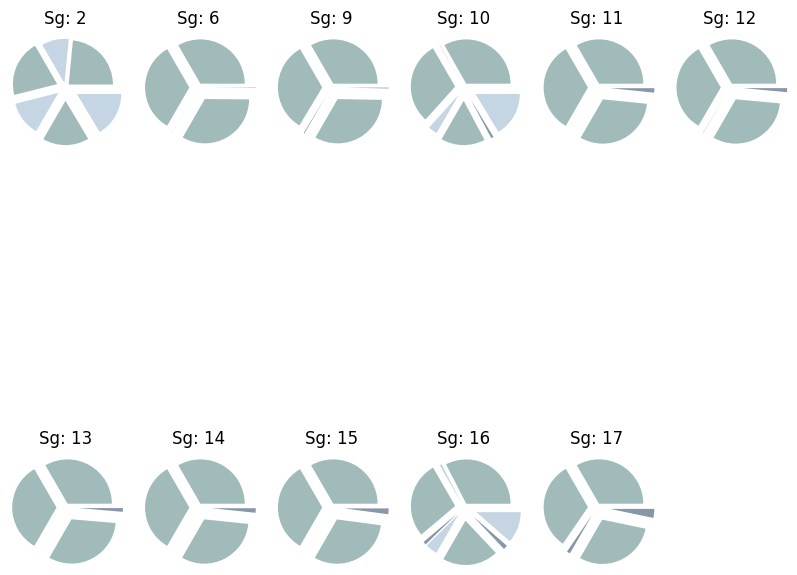

In [115]:
color3 = [160, 187, 186] ./ 255
color4 = [136, 150, 171] ./ 255
color5 = [197, 213, 228] ./ 255
figure(figsize=(10, 10))
for (i, sg) in enumerate([2, 6, 9:17...])
    subplot(2, 6, i)
        title("Sg: $sg")
#=
    data_trivial = float.(trivial_count[(sg, 1, "te")][1:3])
    data_fragile = float.(fragile_count[(sg, 1, "te")][1:3])
    data_stable = float.(stable_count[(sg, 1, "te")][1:3])

    tots = data_trivial + data_fragile + data_stable

    data_trivial .*= 1 ./ tots
    data_fragile .*= 1 ./ tots
    data_stable .*= 1 ./ tots
    pie(vcat([[data_trivial[i], data_fragile[i], data_stable[i]] for i in 1:3]...), colors=vcat([[color3, color4, color5] 
            for i in 1:3]...), explode=(0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0), wedgeprops=Dict("linewidth"=>1, "edgecolor"
            =>"black"))
    =#
    data_trivial = float.(trivial_count[(sg, 1, "tm")][1:3])
    data_fragile = float.(fragile_count[(sg, 1, "tm")][1:3])
    data_stable = float.(stable_count[(sg, 1, "tm")][1:3])

    tots = data_trivial + data_fragile + data_stable

    data_trivial .*= 1 ./ tots
    data_fragile .*= 1 ./ tots
    data_stable .*= 1 ./ tots

    pie(vcat([[data_trivial[i], data_fragile[i], data_stable[i]] for i in 1:3]...), colors=vcat([[color3, color4, color5] 
            for i in 1:3]...),  explode=(0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3), wedgeprops=Dict("linewidth"=>0, "edgecolor"
            =>"black"))
end
savefig("PieChart-eps1-tm.pdf")

In [ ]:
pie(1, 1, 1)

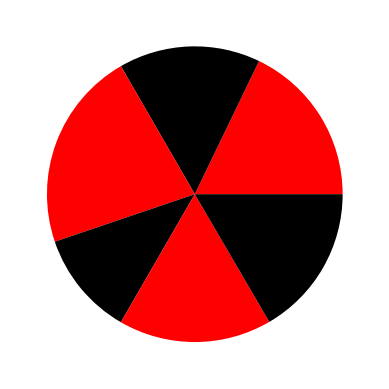

(PyCall.PyObject[PyObject <matplotlib.patches.Wedge object at 0x7fc02dda6460>, PyObject <matplotlib.patches.Wedge object at 0x7fc02dda6940>, PyObject <matplotlib.patches.Wedge object at 0x7fc02dda6dc0>, PyObject <matplotlib.patches.Wedge object at 0x7fc02dd34280>, PyObject <matplotlib.patches.Wedge object at 0x7fc02dd34700>, PyObject <matplotlib.patches.Wedge object at 0x7fc02dd34b80>, PyObject <matplotlib.patches.Wedge object at 0x7fc02dd34fa0>, PyObject <matplotlib.patches.Wedge object at 0x7fc02dd404c0>, PyObject <matplotlib.patches.Wedge object at 0x7fc02dd40940>], PyCall.PyObject[PyObject Text(0.9316504102012653, 0.5848311834810233, ''), PyObject Text(0.4781317942330651, 0.9906512945247031, ''), PyObject Text(-0.04065349102560945, 1.0992485131522494, ''), PyObject Text(-1.0295168397617722, 0.3874210586002438, ''), PyObject Text(-1.0415860703037985, -0.3536926040350447, ''), PyObject Text(-0.8502748931447587, -0.6978772141914862, ''), PyObject Text(0.002534310225101859, -1.09999708

In [67]:
data_trivial = float.(cum_trivial_count[(10, 1, "te")][1:3])
data_fragile = float.(cum_fragile_count[(10, 1, "te")][1:3])
data_stable = float.(cum_stable_count[(10, 1, "te")][1:3])

tots = data_trivial + data_fragile + data_stable

data_trivial .*= 1 ./ tots
data_fragile .*= 1 ./ tots
data_stable .*= 1 ./ tots

pie(vcat([[data_trivial[i], data_fragile[i], data_stable[i]] for i in 1:3]...), colors=vcat([["red", "blue", "black"] 
        for i in 1:3]...))

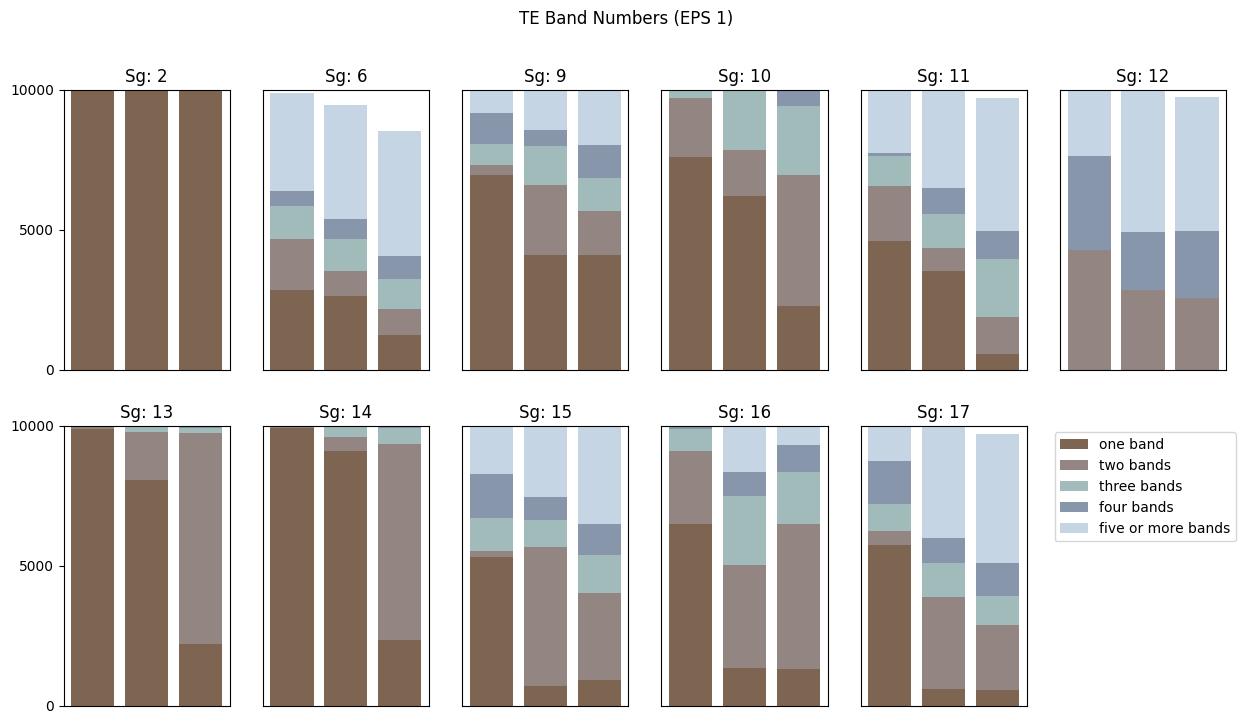

In [160]:
sgs = [2, 6, 9:17...]

color1 = [126, 101, 81] ./ 255
color2 = [147, 133, 129] ./ 255
#color3 = [70, 99, 98] ./ 255
color3 = [160, 187, 186] ./ 255
color4 = [136, 150, 171] ./ 255
color5 = [197, 213, 228] ./ 255
band_set_range = 1:3
fig, (axes) = subplots(2, 6, figsize=(15, 8), gridspec_kw=Dict("width_ratios" => ones(Int, 6), "height_ratios" => [1, 1]))
for (sg_idx, sg) in enumerate(sgs)
    row = sg_idx > 6 ? 2 : 1
    col = rem(sg_idx, 6) 
    col = col == 0 ? 6 : col
    ax = axes[row, col]
    ax.set_title("Sg: $sg")
    
    num_band_data = num_bands_count[(sg, 1, "te")][band_set_range]
    one_band_data = [x[1] for x in num_band_data]
    two_band_data = [x[2] for x in num_band_data]
    three_band_data = [x[3] for x in num_band_data]
    four_band_data = [x[4] for x in num_band_data]
    five_or_more_band_data = [x[5] for x in num_band_data]

    ax.bar(band_set_range, one_band_data, color = color1, label="one band")
    ax.bar(band_set_range, two_band_data, bottom = one_band_data, color = color2, label="two bands")
    ax.bar(band_set_range, three_band_data, bottom = one_band_data + two_band_data, color = color3, label="three bands")
    ax.bar(band_set_range, four_band_data, bottom = one_band_data + two_band_data + three_band_data, color = color4, label="four bands")
    ax.bar(band_set_range, five_or_more_band_data , bottom = one_band_data + two_band_data + 
        three_band_data + four_band_data, color=color5, label="five or more bands")

    ax.set_ylim(0, 1e4)
    
    (col == 5 && row == 2) && ax.legend(loc= "lower right")
    col == 1 ? ax.set_yticks([0, 5e3, 1e4]) : ax.set_yticks([])
    ax.set_xticks([])
    
    if (col == 5 && row == 2)
        bb = ax.legend().get_bbox_to_anchor().inverse_transformed(ax.transAxes)

        xOffset = 1.3
        bb.x0 += xOffset
        bb.x1 += xOffset
        ax.legend().set_bbox_to_anchor(bb, transform = ax.transAxes)
    end
    
end
suptitle("TE Band Numbers (EPS 1)")
delaxes(axes[2, 6])
savefig("TEBandNumbers.pdf")

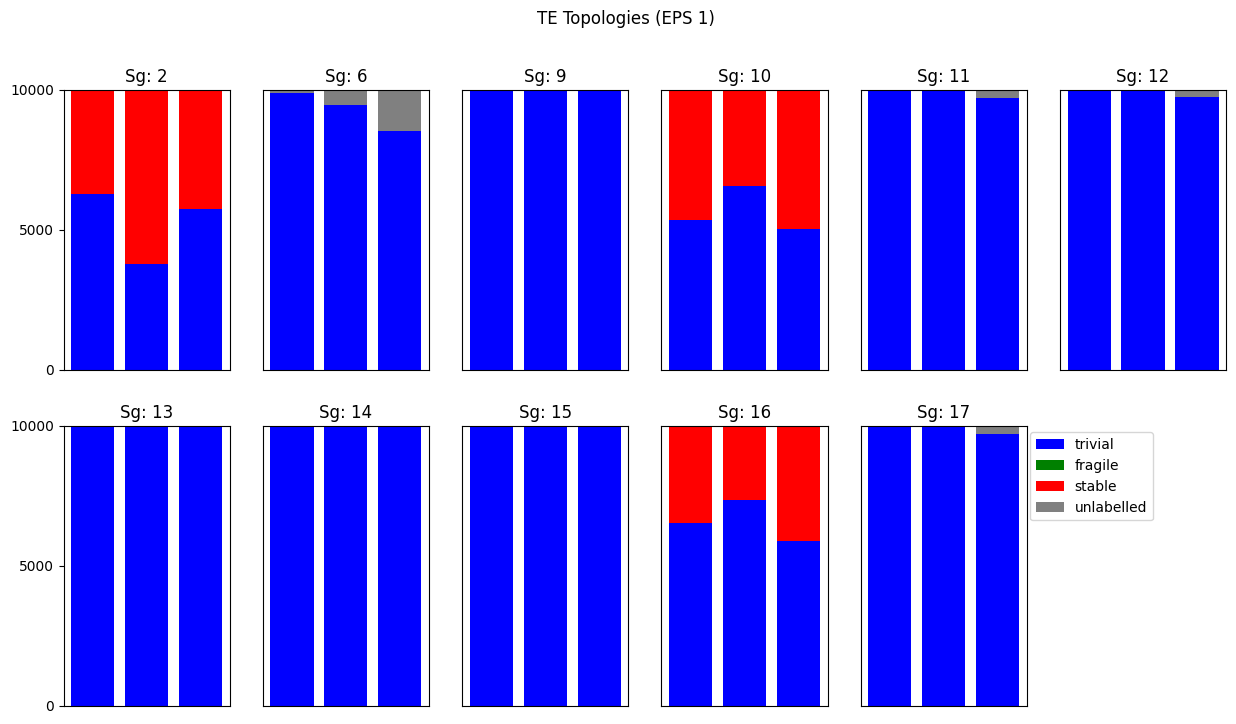

Integer[0, 0, 0]
Integer[0, 0, 0]
Integer[0, 0, 0]
Integer[0, 0, 0]
Integer[0, 0, 0]
Integer[0, 0, 0]
Integer[0, 0, 0]
Integer[0, 0, 0]
Integer[0, 0, 0]
Integer[0, 0, 0]
Integer[0, 0, 0]


In [17]:
sgs = [2, 6, 9:17...]

band_set_range = 1:3
fig, (axes) = subplots(2, 6, figsize=(15, 8), gridspec_kw=Dict("width_ratios" => ones(Int, 6), "height_ratios" => [1, 1]))
for (sg_idx, sg) in enumerate(sgs)
    row = sg_idx > 6 ? 2 : 1
    col = rem(sg_idx, 6) 
    col = col == 0 ? 6 : col
    ax = axes[row, col]
    ax.set_title("Sg: $sg")
    
    trivial_data = cum_trivial_count[(sg, 1, "te")][band_set_range]
    fragile_data = cum_fragile_count[(sg, 1, "te")][band_set_range]
    stable_data = cum_stable_count[(sg, 1, "te")][band_set_range]
    
    println(fragile_data)

    ax.bar(band_set_range, trivial_data, color = "blue", label="trivial")
    ax.bar(band_set_range, fragile_data, bottom = trivial_data, color="green", label="fragile")
    ax.bar(band_set_range, stable_data, bottom = trivial_data + fragile_data, color="red", label="stable")
    ax.bar(band_set_range, 10000 .- (stable_data + fragile_data + trivial_data), bottom = trivial_data + fragile_data + stable_data, color="grey", label = "unlabelled")
    ax.set_ylim(0, 1e4)
    
    (col == 5 && row == 2) && ax.legend(loc= "lower right")
    col == 1 ? ax.set_yticks([0, 5e3, 1e4]) : ax.set_yticks([])
    #ax.set_yticks([0, 5e3, 1e4], fontsize=3)
    ax.set_xticks([])
    
    if (col == 5 && row == 2)
        bb = ax.legend().get_bbox_to_anchor().inverse_transformed(ax.transAxes)

        xOffset = 0.8
        bb.x0 += xOffset
        bb.x1 += xOffset
        ax.legend().set_bbox_to_anchor(bb, transform = ax.transAxes)
    end
    
end
suptitle("TE Topologies (EPS 1)")
delaxes(axes[2, 6])

In [116]:
num_groupings = 40

te_corner_stats = []
tm_corner_stats = []

for (sg_idx, sg) in enumerate((2, 6, (9:17)...))
    println(sg); flush(stdout)
    brs = bandreps(sg, 2)
    wyckoff_positions = sg_wyckoffs[sg_idx]
    for polarization in ("te", "tm")
        
        corner_sg_stats = zeros(num_groupings)

        for id in 1:100
            
            corner_id_stats = zeros(num_groupings)
            
            symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/output")
            lgirsd = pick_lgirreps(lgd)
            fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
            band_groupings = analyze_symmetry_data(symeigsd, lgirsd, brs)
            
            for wyckoff in wyckoff_positions
                corner_id_stats .+= [
                    (isapprox.(Ref(zeros(2)), polarizations.(band_groupings, Ref(wyckoff)); atol=1e-5) .&& 
                        (!).(isapprox.(0, corners.(band_groupings, Ref(wyckoff)); atol=1e-5)))...,
                    zeros(num_groupings - length(band_groupings))...
                ]
            end
            
            corner_id_stats = corner_id_stats .> 0 
            
            corner_sg_stats += corner_id_stats
        end
        if polarization == "te"
            push!(te_corner_stats, corner_sg_stats)
        elseif polarization == "tm"
            push!(tm_corner_stats, corner_sg_stats)
        end
              
    end
end

2
6
9
10
11
12
13
14
15
16
17


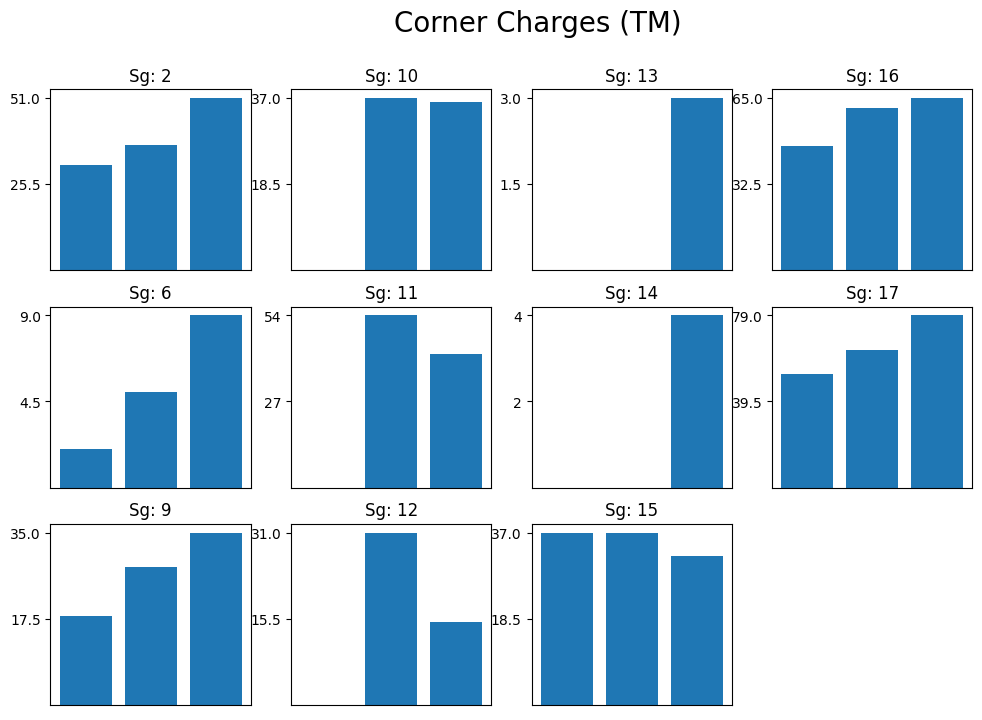

In [117]:
using PyPlot
sgs = [2, 6, (9:17)...]
fig, (axes) = subplots(3, 5, figsize=(15, 8))
fig.suptitle("Corner Charges (TM)", fontsize=20, x=0.45)
for i in 1:15
    try
        axes[i].bar(1:3, tm_corner_stats[i][1:3])
        top_tick = maximum(tm_corner_stats[i][1:3])

        axes[i].set_yticks([top_tick/2, top_tick])
        axes[i].set_xticks(Float64[])
        axes[i].set_title("Sg: $(sgs[i])")
    catch
        delaxes(axes[i])
    end
end


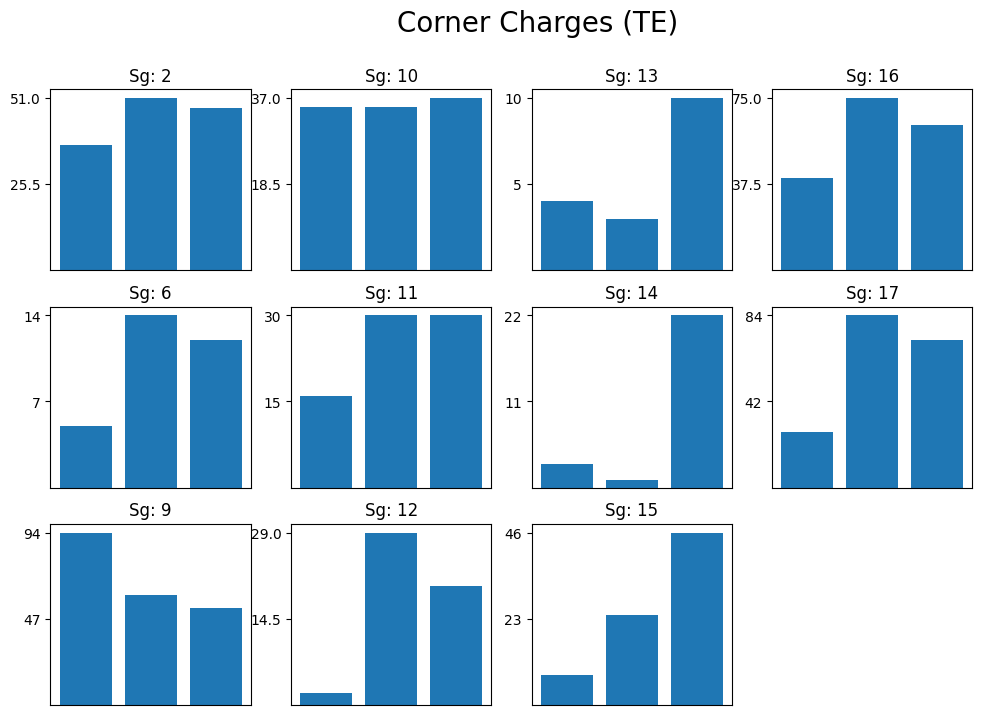

In [118]:
using PyPlot
sgs = [2, 6, (9:17)...]
fig, (axes) = subplots(3, 5, figsize=(15, 8))
fig.suptitle("Corner Charges (TE)", fontsize=20, x=0.45)
for i in 1:15
    try
        axes[i].bar(1:3, te_corner_stats[i][1:3])
        top_tick = maximum(te_corner_stats[i][1:3])

        axes[i].set_yticks([top_tick/2, top_tick])
        axes[i].set_xticks(Float64[])
        axes[i].set_title("Sg: $(sgs[i])")
    catch
        delaxes(axes[i])
    end
end


In [96]:
sg = 2
id = 1
polarization = "tm"
brs = bandreps(sg, 2)
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings1 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 2
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings2 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 3
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings3 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 4
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings4 = analyze_symmetry_data(symeigsd, lgirsd, brs);
length(band_groupings1) == length(band_groupings2)

true

In [97]:
band_groupings1[1].brs.sgnum

2

In [98]:
for (bg1, bg2, bg3, bg4) in zip(band_groupings1, band_groupings2, band_groupings3, band_groupings4)
    diffab = corner_sg2(bg1, WyckoffPosition(1, 'b', RVec([0, 0.5]))) - corner_sg2(bg2)
    diffac = corner_sg2(bg1, WyckoffPosition(1, 'c', RVec([0.5, 0]))) - corner_sg2(bg3)
    diffad = corner_sg2(bg1, WyckoffPosition(1, 'd', RVec([0.5, 0.5]))) - corner_sg2(bg4)
    (diffab != 0 || diffac != 0 || diffad != 0) && error("Nonzero difference, $diffad ")

    diffab = polarization_sg2(bg1, WyckoffPosition(1, 'b', RVec([0, 0.5]))) - polarization_sg2(bg2)
    diffac = polarization_sg2(bg1, WyckoffPosition(1, 'c', RVec([0.5, 0]))) - polarization_sg2(bg3)
    diffad = polarization_sg2(bg1, WyckoffPosition(1, 'd', RVec([0.5, 0.5]))) - polarization_sg2(bg4)
    (!iszero(diffab) || !iszero(diffac) || !iszero(diffad)) && error("Nonzero difference, $diffad ")
end

In [99]:
sg = 6
id = 1
polarization = "tm"
brs = bandreps(sg, 2)
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings1 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 2
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings2 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 3
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings3 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 4
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings4 = analyze_symmetry_data(symeigsd, lgirsd, brs);
length(band_groupings1) == length(band_groupings2) == length(band_groupings3) == length(band_groupings4)

true

In [100]:
for (bg1, bg2, bg3, bg4) in zip(band_groupings1, band_groupings2, band_groupings3, band_groupings4)
    diffab = corner_sg6(bg1, WyckoffPosition(1, 'b', RVec([0, 0.5]))) - corner_sg6(bg2)
    diffac = corner_sg6(bg1, WyckoffPosition(1, 'c', RVec([0.5, 0]))) - corner_sg6(bg3)
    diffad = corner_sg6(bg1, WyckoffPosition(1, 'd', RVec([0.5, 0.5]))) - corner_sg6(bg4)
    (diffab != 0 || diffac != 0 || diffad != 0) && error("Nonzero difference")

    diffab = polarization_sg6(bg1, WyckoffPosition(1, 'b', RVec([0, 0.5]))) - polarization_sg6(bg2)
    diffac = polarization_sg6(bg1, WyckoffPosition(1, 'c', RVec([0.5, 0]))) - polarization_sg6(bg3)
    diffad = polarization_sg6(bg1, WyckoffPosition(1, 'd', RVec([0.5, 0.5]))) - polarization_sg6(bg4)
    (!iszero(diffab) || !iszero(diffac) || !iszero(diffad)) && error("Nonzero difference, $diffad ")
end

In [103]:
corner_sg6(band_groupings1[1])

0.5

In [104]:
corner_sg6(band_groupings1[1], WyckoffPosition(1, 'b', RVec([0, 0.5])))

0.0

In [105]:
corner_sg6(band_groupings1[1], WyckoffPosition(1, 'c', RVec([0, 0.5])))

0.0

In [ ]:
corner_sg6(band_groupings1[1], WyckoffPosition(1, 'd', RVec([0, 0.5])))

In [102]:
sg = 9
id = 1
polarization = "tm"
brs = bandreps(sg, 2)
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings1 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 2
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings2 = analyze_symmetry_data(symeigsd, lgirsd, brs);
length(band_groupings1) == length(band_groupings2)

true

In [96]:
for (bg1, bg2) in zip(band_groupings1, band_groupings2)
    diffab = corner_sg9(bg1, WyckoffPosition(2, 'b', RVec([0, 0.5]))) - corner_sg9(bg2)
    (diffab !=0) && error("Nonzero difference")
    
    diffab = polarization_sg9(bg1, WyckoffPosition(2, 'b', RVec([0, 0.5]))) - polarization_sg9(bg2)
    !iszero(diffab) && error("Nonzero difference")
end

In [1]:
sg = 13
id = 1
polarization = "tm"
brs = bandreps(sg, 2)
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings1 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 2
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings2 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 3
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings3 = analyze_symmetry_data(symeigsd, lgirsd, brs);
length(band_groupings1) == length(band_groupings2)

LoadError: UndefVarError: bandreps not defined

In [98]:
for (bg1, bg2, bg3) in zip(band_groupings1, band_groupings2, band_groupings3)
    diffab = corner_sg13(bg1, WyckoffPosition(1, 'b', RVec([1/3, 2/3]))) - corner_sg13(bg2)
    diffac = corner_sg13(bg1, WyckoffPosition(1, 'c', RVec([2/3, 1/3]))) - corner_sg13(bg3)
    (diffab != 0 || diffac != 0) && error("Nonzero difference $diffab")
    
    diffab = polarization_sg13(bg1, WyckoffPosition(1, 'b', RVec([1/3, 2/3]))) - polarization_sg13(bg2)
    diffac = polarization_sg13(bg1, WyckoffPosition(1, 'c', RVec([2/3, 1/3]))) - polarization_sg13(bg3)
    (!iszero(diffab)  || !iszero(diffac)) && error("Nonzero difference $diffab")
end

In [104]:
sg = 14
id = 1
polarization = "tm"
brs = bandreps(sg, 2)
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings1 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 2
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings2 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 3
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings3 = analyze_symmetry_data(symeigsd, lgirsd, brs);
length(band_groupings1) == length(band_groupings2)

true

In [100]:
for (bg1, bg2, bg3) in zip(band_groupings1, band_groupings2, band_groupings3)
    diffab = corner_sg14(bg1, WyckoffPosition(1, 'b', RVec([1/3, 2/3]))) - corner_sg14(bg2)
    diffac = corner_sg14(bg1, WyckoffPosition(1, 'c', RVec([2/3, 1/3]))) - corner_sg14(bg3)
    (diffab != 0 || diffac != 0) && error("Nonzero difference $diffab")
    
    diffab = polarization_sg14(bg1, WyckoffPosition(1, 'b', RVec([1/3, 2/3]))) - polarization_sg14(bg2)
    diffac = polarization_sg14(bg1, WyckoffPosition(1, 'c', RVec([2/3, 1/3]))) - polarization_sg14(bg3)
    (!iszero(diffab)  || !iszero(diffac)) && error("Nonzero difference $diffab")
end

In [105]:
sg = 10
id = 1
polarization = "tm"
brs = bandreps(sg, 2)
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings1 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 2
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings2 = analyze_symmetry_data(symeigsd, lgirsd, brs);
length(band_groupings1) == length(band_groupings2)

true

In [102]:
for (bg1, bg2) in zip(band_groupings1, band_groupings2)
    diffab = corner_sg10(bg1, WyckoffPosition(1, 'b', RVec([1/2, 1/2]))) - corner_sg10(bg2)
    (diffab !=0 ) && error("Nonzero difference $diffab")
    
    diffab = polarization_sg10(bg1, WyckoffPosition(1, 'b', RVec([1/2, 1/2]))) - polarization_sg10(bg2)
    !iszero(diffab) && error("Nonzero difference $diffab")
end

In [106]:
sg = 11
id = 1
polarization = "tm"
brs = bandreps(sg, 2)
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings1 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 2
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings2 = analyze_symmetry_data(symeigsd, lgirsd, brs);
length(band_groupings1) == length(band_groupings2)

true

In [119]:
for (bg1, bg2) in zip(band_groupings1, band_groupings2)
    diffab = corner_sg11(bg1, WyckoffPosition(1, 'b', RVec([1/2, 1/2]))) - corner_sg11(bg2)
    (diffab !=0 ) && error("Nonzero difference $diffab")
    
    diffab = polarization_sg11(bg1, WyckoffPosition(1, 'b', RVec([1/2, 1/2]))) - polarization_sg11(bg2)
    !iszero(diffab) && error("Nonzero difference $diffab")
end

In [211]:
sg = 12
id = 1
polarization = "tm"
brs = bandreps(sg, 2)
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings1 = analyze_symmetry_data(symeigsd, lgirsd, brs);
id = 2
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings2 = analyze_symmetry_data(symeigsd, lgirsd, brs);
length(band_groupings1) == length(band_groupings2)

true

In [214]:
for (bg1, bg2) in zip(band_groupings1, band_groupings2)
    diffab = corner_sg12(bg1, WyckoffPosition(2, 'b', RVec([1/2, 0]))) - corner_sg12(bg2)
    (diffab !=0 ) && error("Nonzero difference $diffab")
    
    diffab = polarization_sg12(bg1, WyckoffPosition(2, 'b', RVec([1/2, 0]))) - polarization_sg12(bg2)
    !iszero(diffab) && error("Nonzero difference $diffab")
end

In [42]:
id = 2
symeigsd2, lgd = read_symdata("dim2-sg$sg-2-res64-$polarization", dir="./symeigs/shiftedlattices/output");


In [143]:
sg = 12
id = 1000
polarization = "te"
brs = bandreps(sg, 2)
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings1 = analyze_symmetry_data(symeigsd, lgirsd, brs);
sg = 12
id = 1001
polarization = "te"
brs = bandreps(sg, 2)
symeigsd, lgd = read_symdata("dim2-sg$sg-$id-res64-$polarization", dir="./symeigs/shiftedlattices/output");
lgirsd = pick_lgirreps(lgd)
fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(polarization)))
band_groupings2 = analyze_symmetry_data(symeigsd, lgirsd, brs);

# Two Fold Rotational Symmetries

$1/4(-X1-Y1+M1)$

With regards to spacegroup 9, note that the Y point is given as [1, 0] in the conventional basis, but this is equivalent to [1/2, 1/2] in the primitive basis. Note that if the conventional basis is (a, 0), (0, b), the primitive basis is (a/2, b/2), (a/2, -b/2), so the point (0, 1/2) in the primitive basis is equivalent to the point (1/2, -1/2) in the primitive basis) (or equivalently (1/2, 1/2). Furthermore, if the conventional reciprocal basis is 2pi(1/a, 0), 2pi(0, 1/b), the primitive reciprocal basis is given by 2pi(1/a, 1/b), 2pi(1/a, -1/b), so the point [1, 0] in the conventional basis is [1/2, 1/2] in the primitive reciprocal basis. 

In [22]:
last([1, 2, 3])

3

# Formulas from Wladimir's paper - Explain the subscript/superscript notation and the mapping between eigenvalues and little group irreps


In [209]:
filename = "./symeigs/shiftedlattices/output/"*"dim2-sg12-1-res64-tm-epsilon.h5"                
fid = h5open(filename, "r")
eps1 = read(fid)["data"]
close(fid)
filename = "./symeigs/shiftedlattices/output/"*"dim2-sg12-2-res64-tm-epsilon.h5"                
fid = h5open(filename, "r")
eps2 = read(fid)["data"]
close(fid)

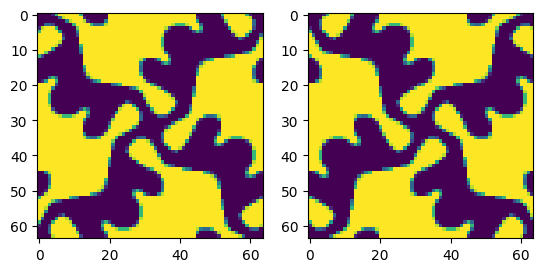

PyObject <matplotlib.image.AxesImage object at 0x7f979d744340>

In [210]:
figure()
subplot(1, 2, 1)
imshow(eps1)
subplot(1, 2, 2)
imshow(eps2)

In [204]:
filename = "./symeigs/shiftedlattices/output/"*"dim2-sg12-1-res64-tm-epsilon.h5"                
fid = h5open(filename, "r")
eps3 = read(fid)["data-new"]
close(fid)
filename = "./symeigs/shiftedlattices/output/"*"dim2-sg12-2-res64-tm-epsilon.h5"                
fid = h5open(filename, "r")
eps4 = read(fid)["data-new"]
close(fid)

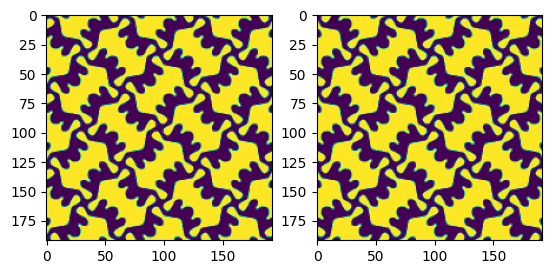

PyObject <matplotlib.image.AxesImage object at 0x7f979d8d2850>

In [205]:
figure()
subplot(1, 2, 1)
imshow(eps3)
subplot(1, 2, 2)
imshow(np.roll(eps4, 0, axis=1))


In [201]:
wyckoffs(12, 2)

4-element Vector{WyckoffPosition{2}}:
 8d: [α, β]
 4c: [α, 1/2+α]
 2b: [1/2, 0]
 2a: [0, 0]

In [194]:
iszero(np.roll(eps3, 32, axis=1) - np.roll(eps4, 32, axis=0))

true